# Concrete Dataset Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


%matplotlib inline

## EDA

In [3]:
df = pd.read_csv("dataset.csv", sep=";").reset_index(drop=True)

In [4]:
df.drop(columns=["Unnamed: 0", "id"], inplace=True)

In [5]:
df.head()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3.0,10.38
1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28.0,23.52
2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28.0,36.96
3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365.0,39.05
4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,NaN,74.19


In [6]:
df.columns

Index(['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5407 entries, 0 to 5406
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            5194 non-null   float64
 1   BlastFurnaceSlag           5079 non-null   float64
 2   FlyAshComponent            5258 non-null   float64
 3   WaterComponent             5044 non-null   float64
 4   SuperplasticizerComponent  5178 non-null   float64
 5   CoarseAggregateComponent   5095 non-null   float64
 6   FineAggregateComponent     5133 non-null   float64
 7   AgeInDays                  5062 non-null   float64
 8   Strength                   5407 non-null   float64
dtypes: float64(9)
memory usage: 380.3 KB


In [8]:
df.describe()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,5194.000000,5079.000000,5258.000000,5044.000000,5178.000000,5095.000000,5133.000000,5062.000000,5407.000000
mean,299.073585,58.557531,31.976949,185.067407,4.120614,991.653185,771.449834,51.344528,35.452071
std,105.800354,83.286366,54.667373,18.510484,5.686415,77.165369,78.510465,69.752855,16.401896
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,213.500000,0.000000,0.000000,175.100000,0.000000,938.200000,734.300000,7.000000,23.640000
50%,297.200000,0.000000,0.000000,187.400000,0.000000,978.000000,781.200000,28.000000,33.950000
75%,375.000000,122.600000,79.000000,192.000000,8.100000,1047.000000,821.000000,56.000000,45.850000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [9]:
# missing values
df.isnull().sum()


CementComponent              213
BlastFurnaceSlag             328
FlyAshComponent              149
WaterComponent               363
SuperplasticizerComponent    229
CoarseAggregateComponent     312
FineAggregateComponent       274
AgeInDays                    345
Strength                       0
dtype: int64

In [10]:
# percentuale di missing values in una notazione percentuale
df.isnull().sum() / len(df) *100

CementComponent              3.939338
BlastFurnaceSlag             6.066210
FlyAshComponent              2.755687
WaterComponent               6.713520
SuperplasticizerComponent    4.235251
CoarseAggregateComponent     5.770298
FineAggregateComponent       5.067505
AgeInDays                    6.380618
Strength                     0.000000
dtype: float64

#todo trovare cosa fare con i missing values

<Axes: >

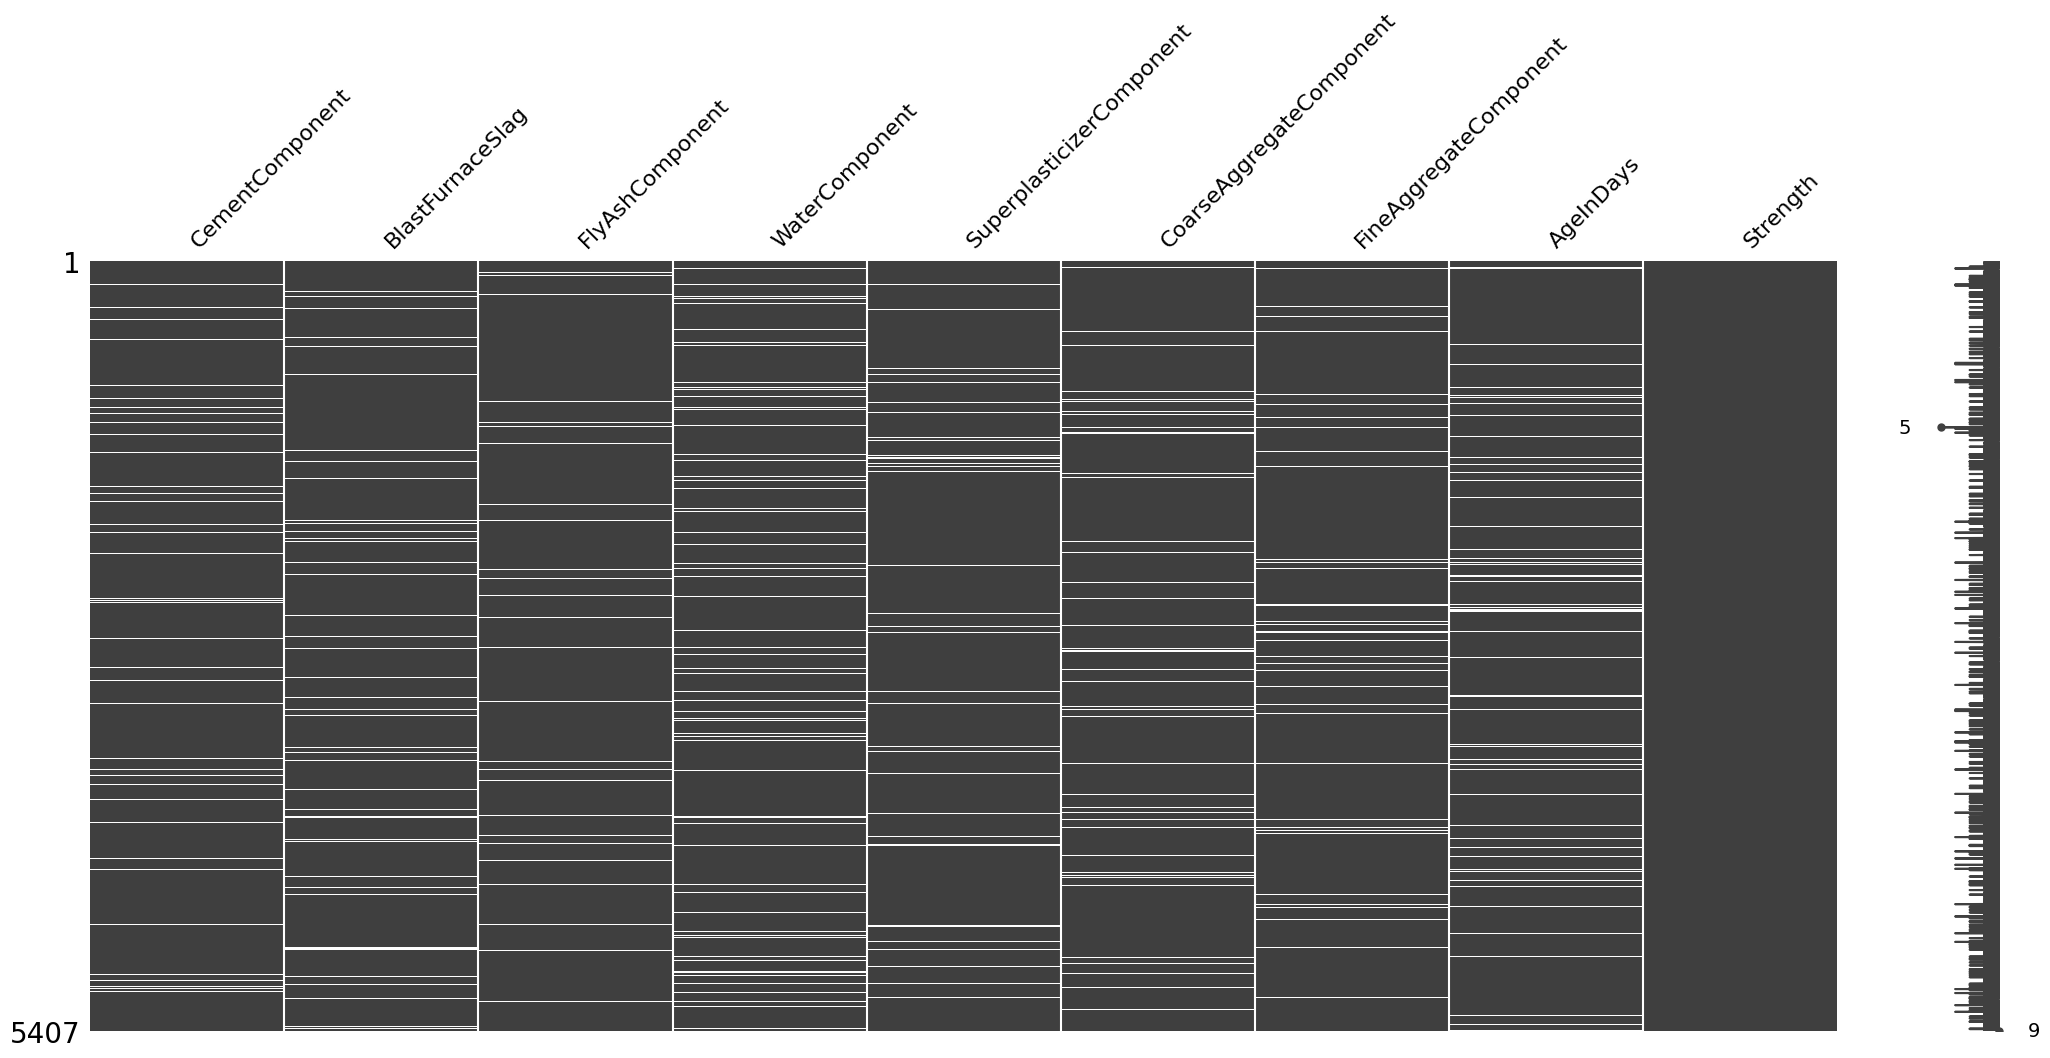

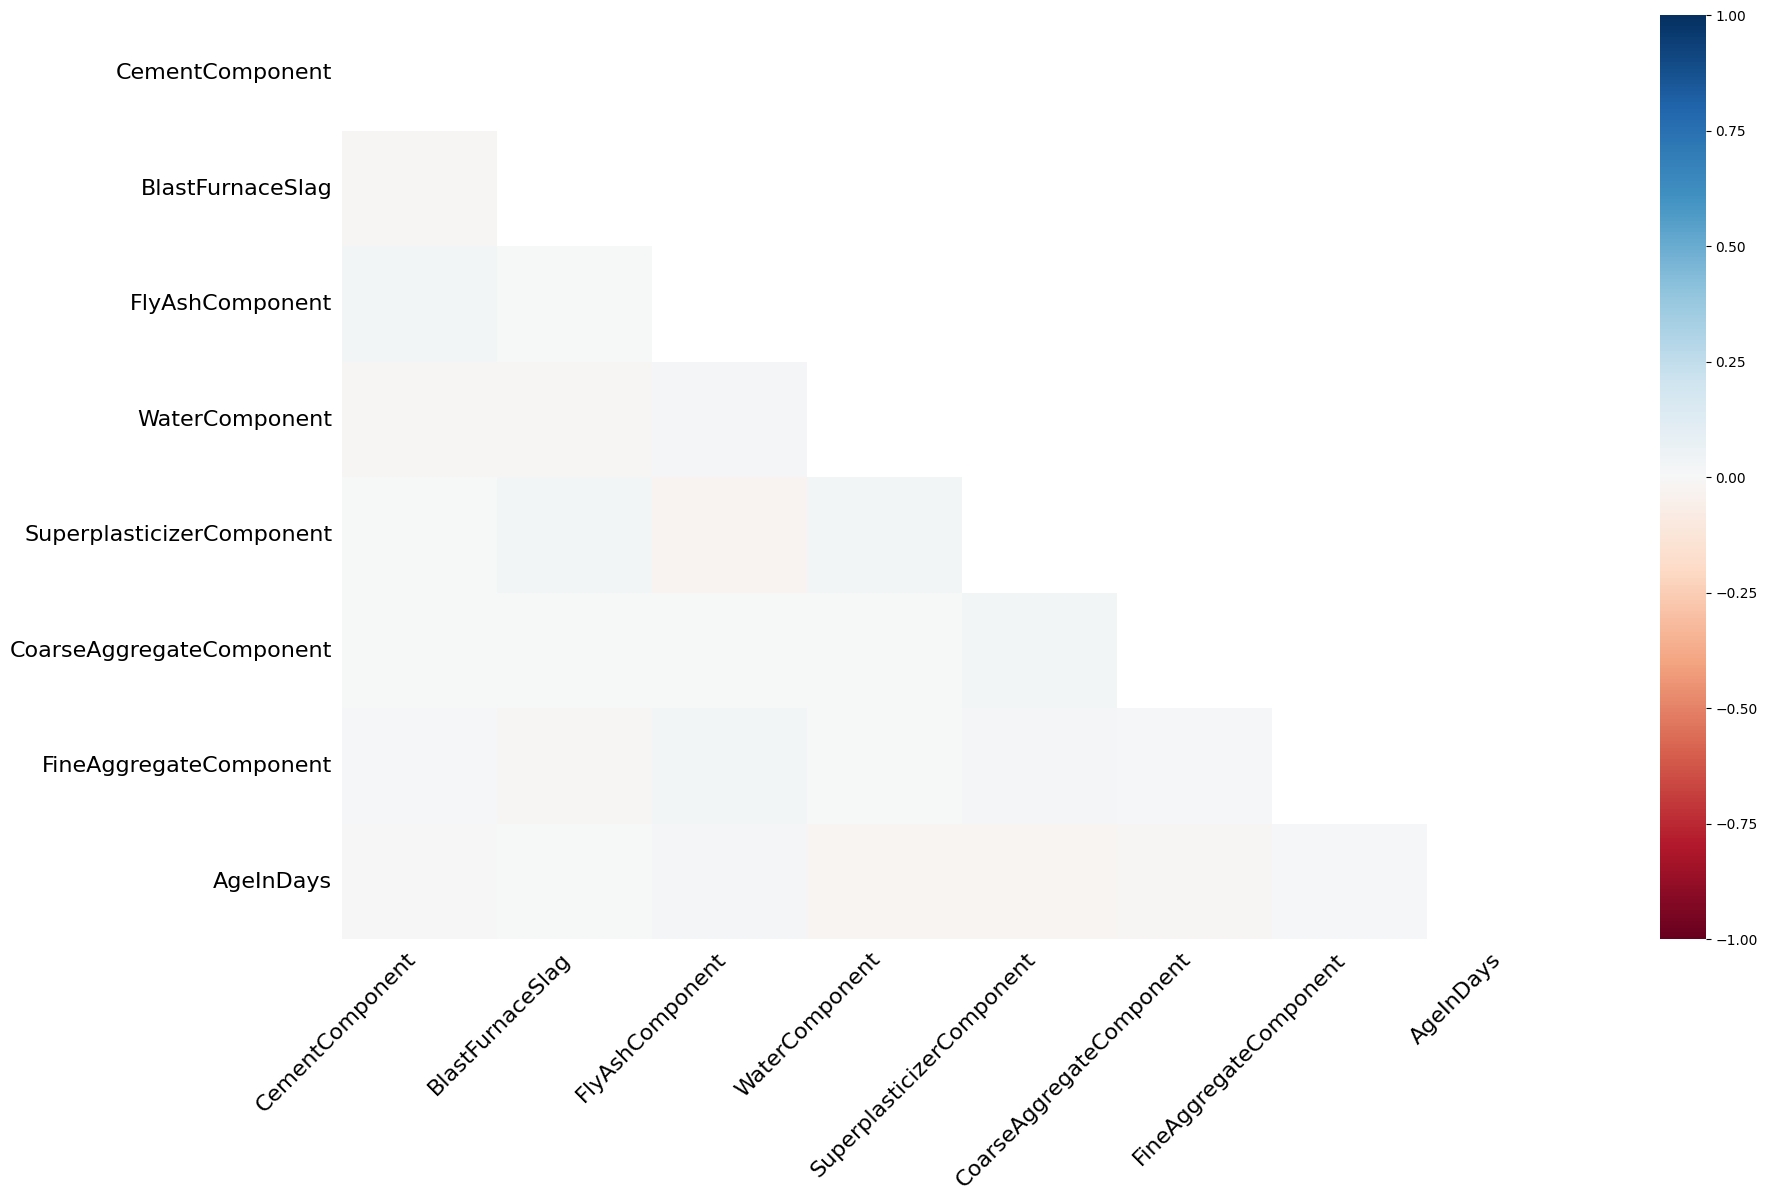

In [11]:
msno.matrix(df)
msno.heatmap(df)

proviamo con o un simple imputer usando la mediana dato che gli histogram sono skewed o con un knn che dovrebbe essere robusto

<Axes: >

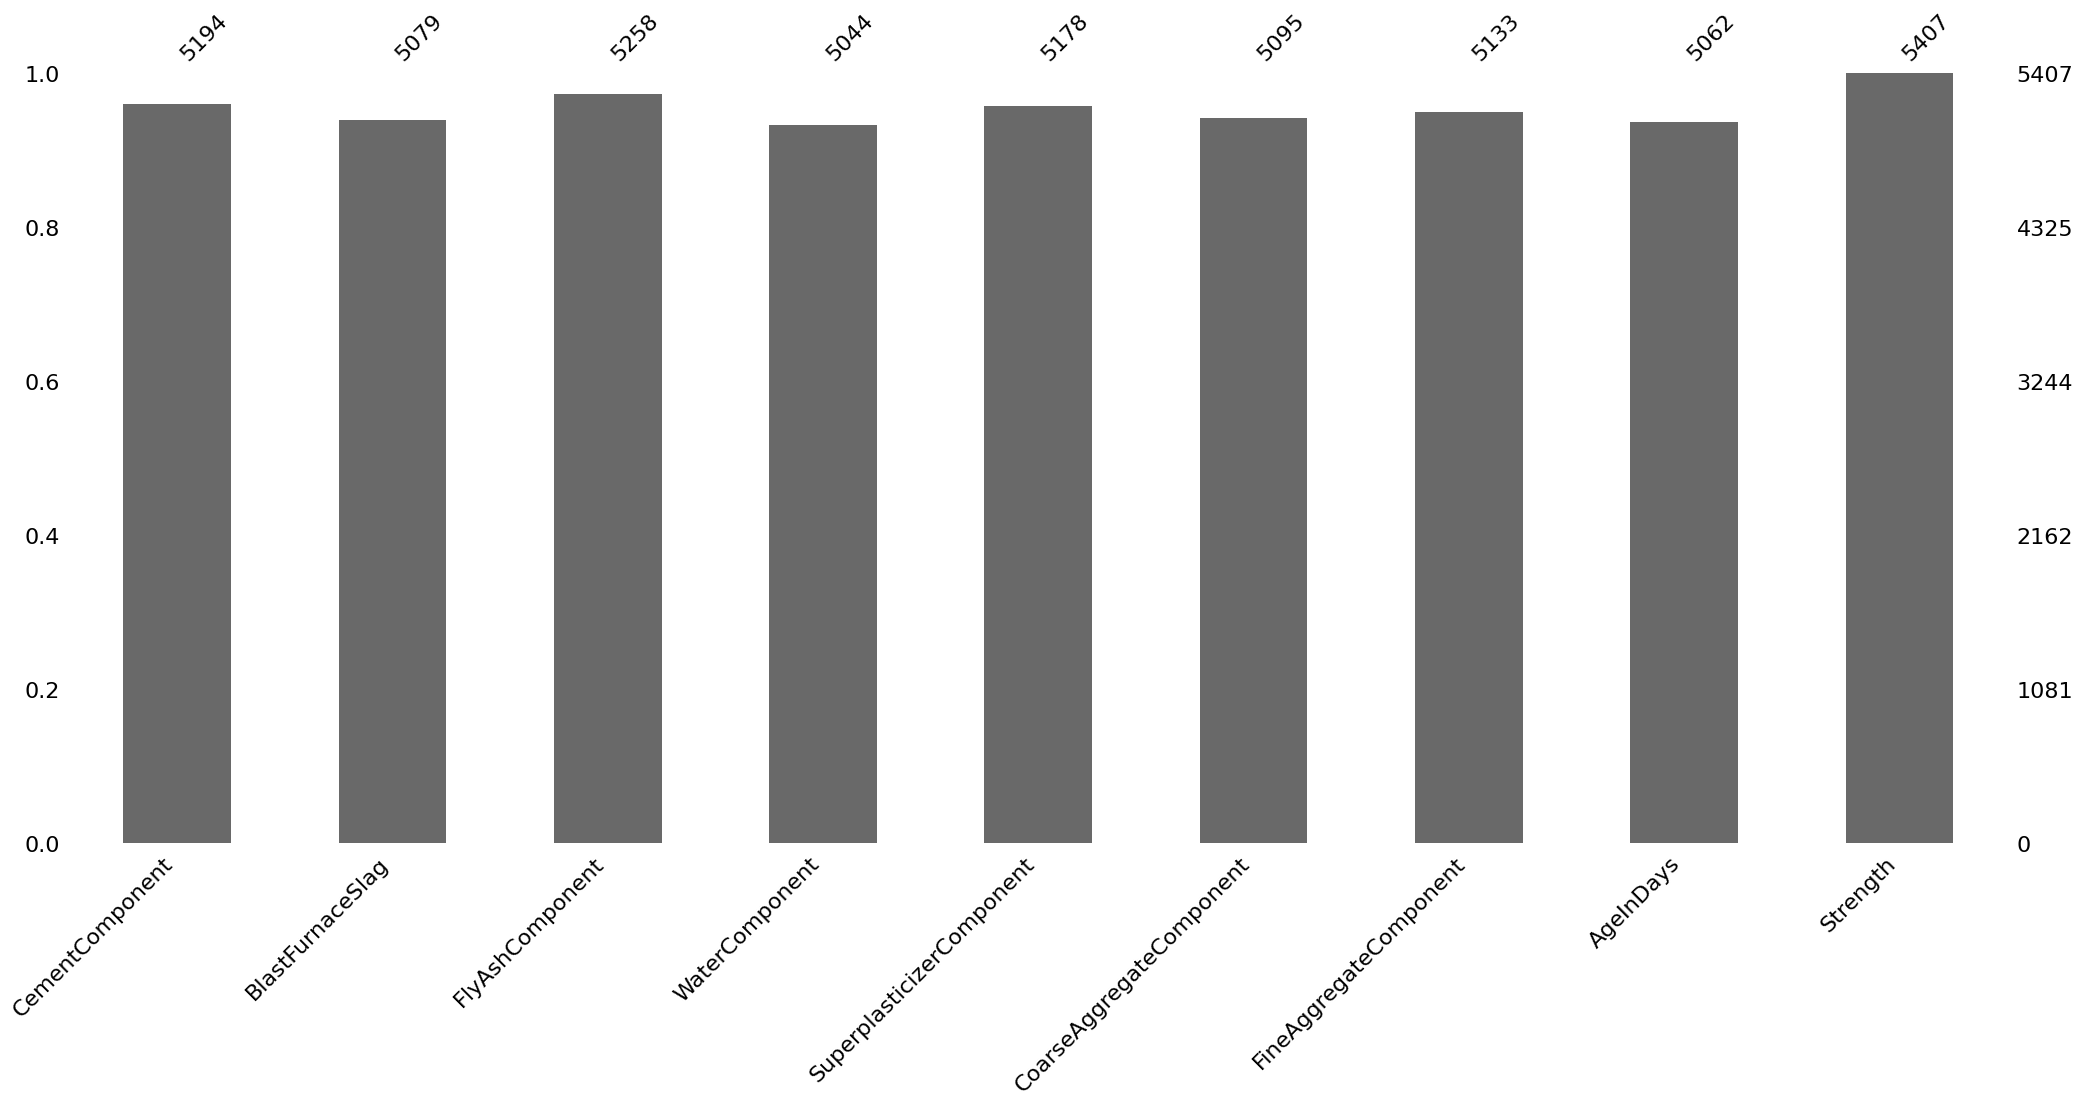

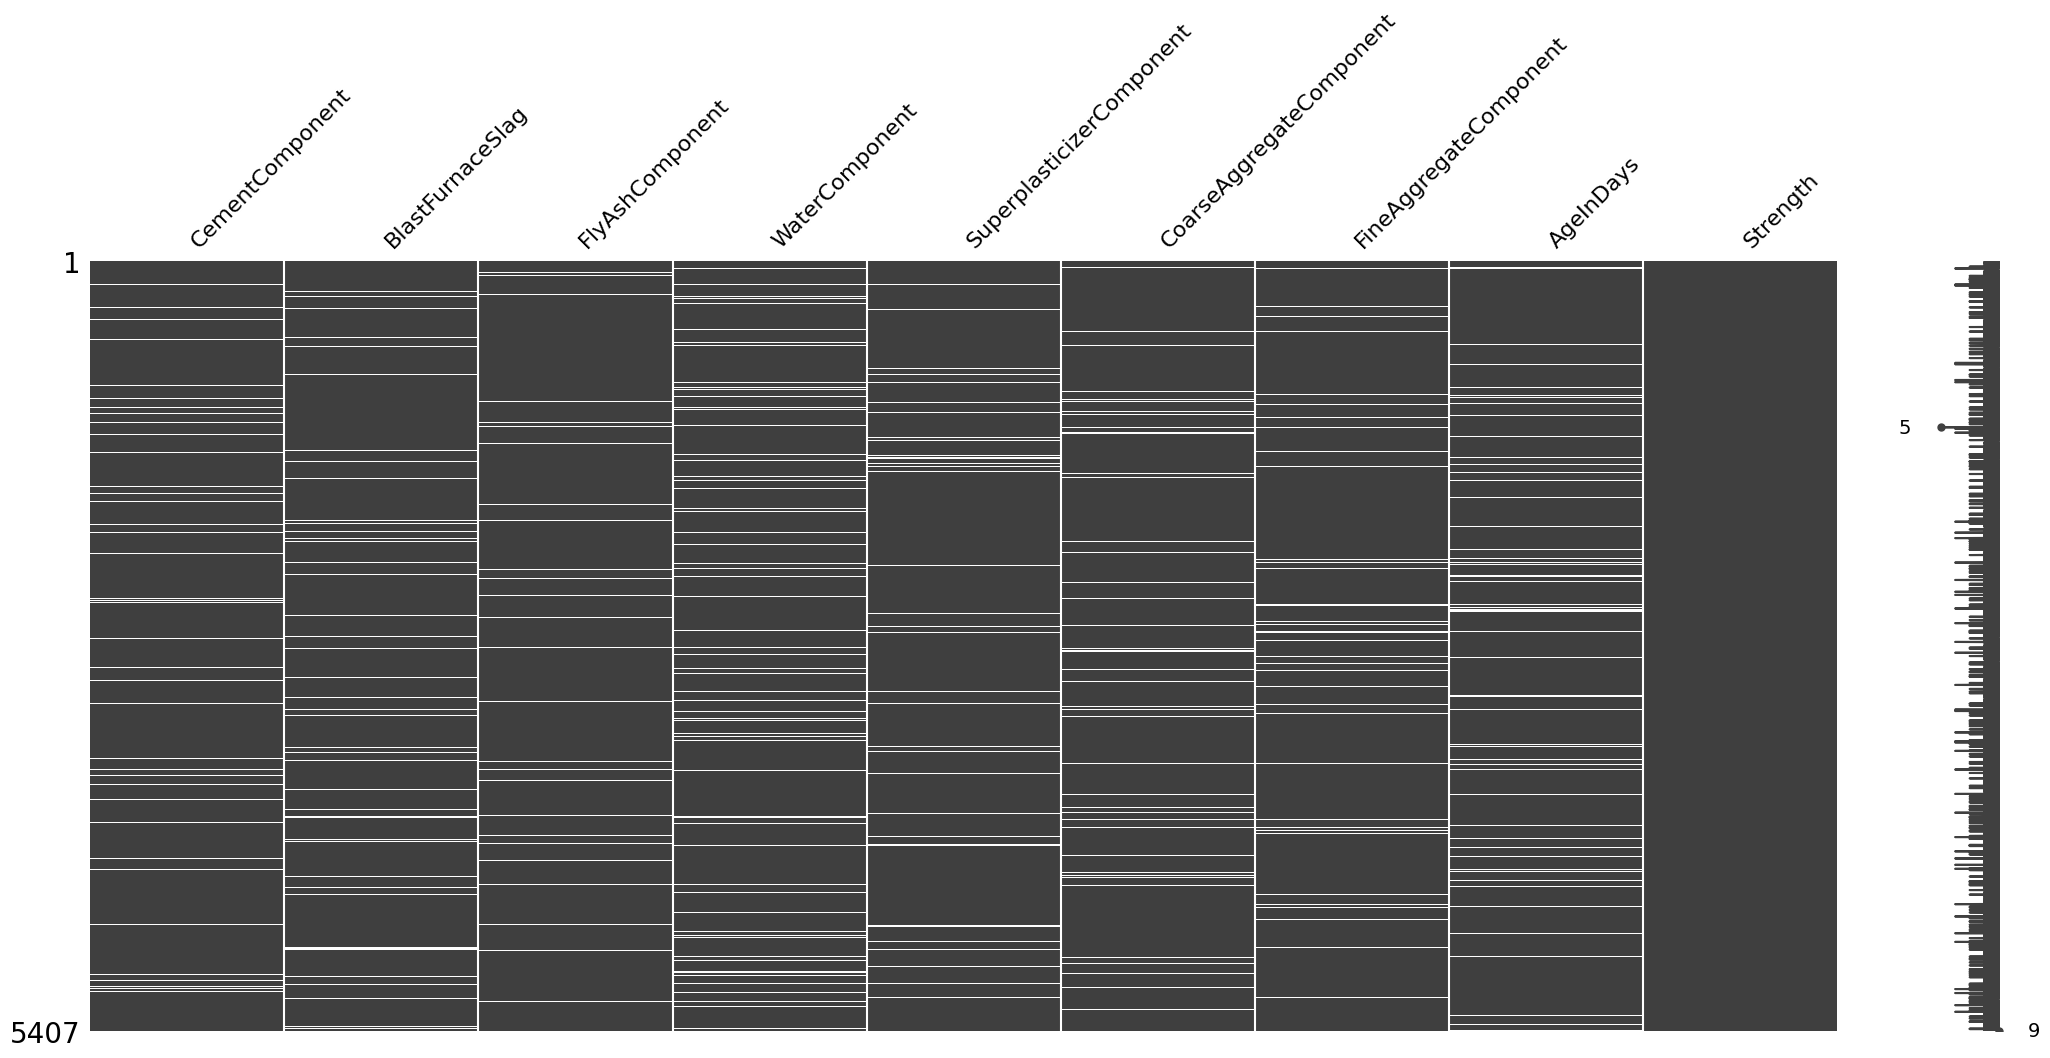

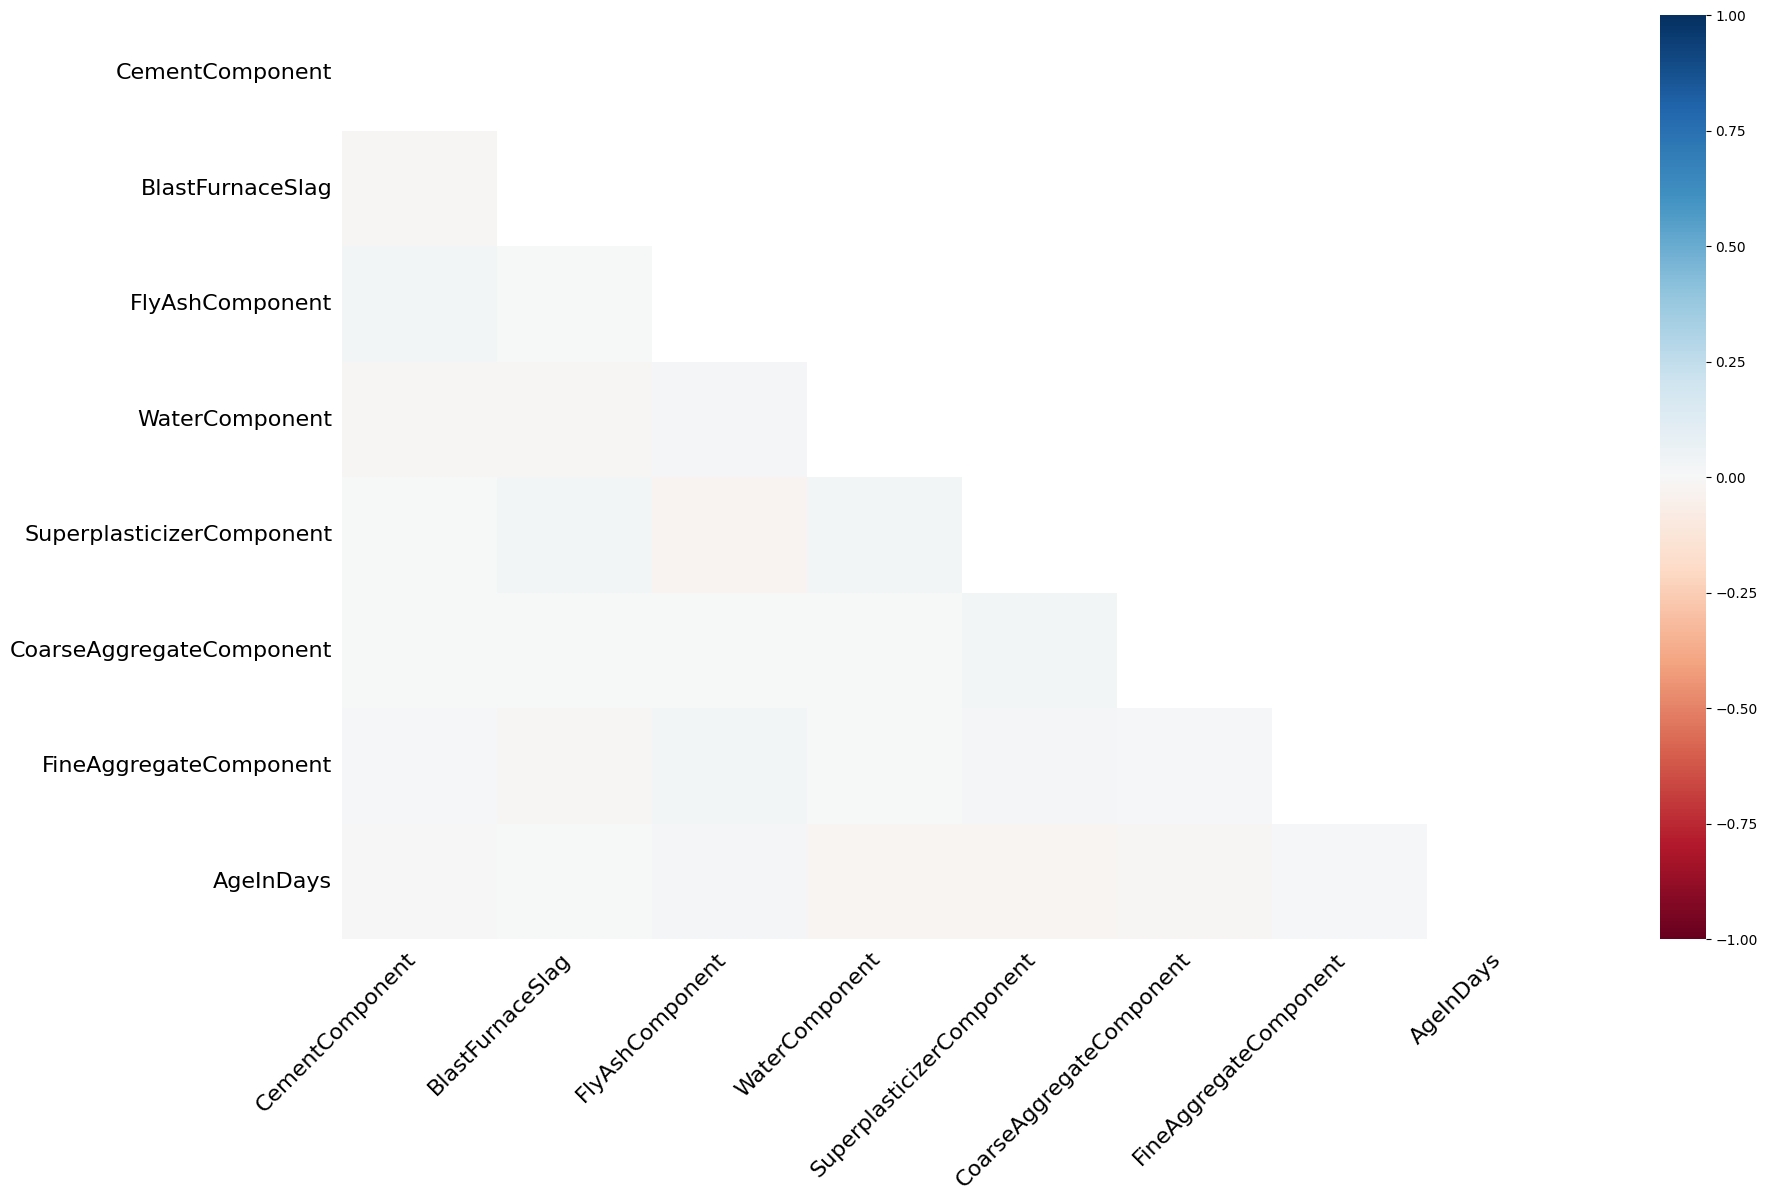

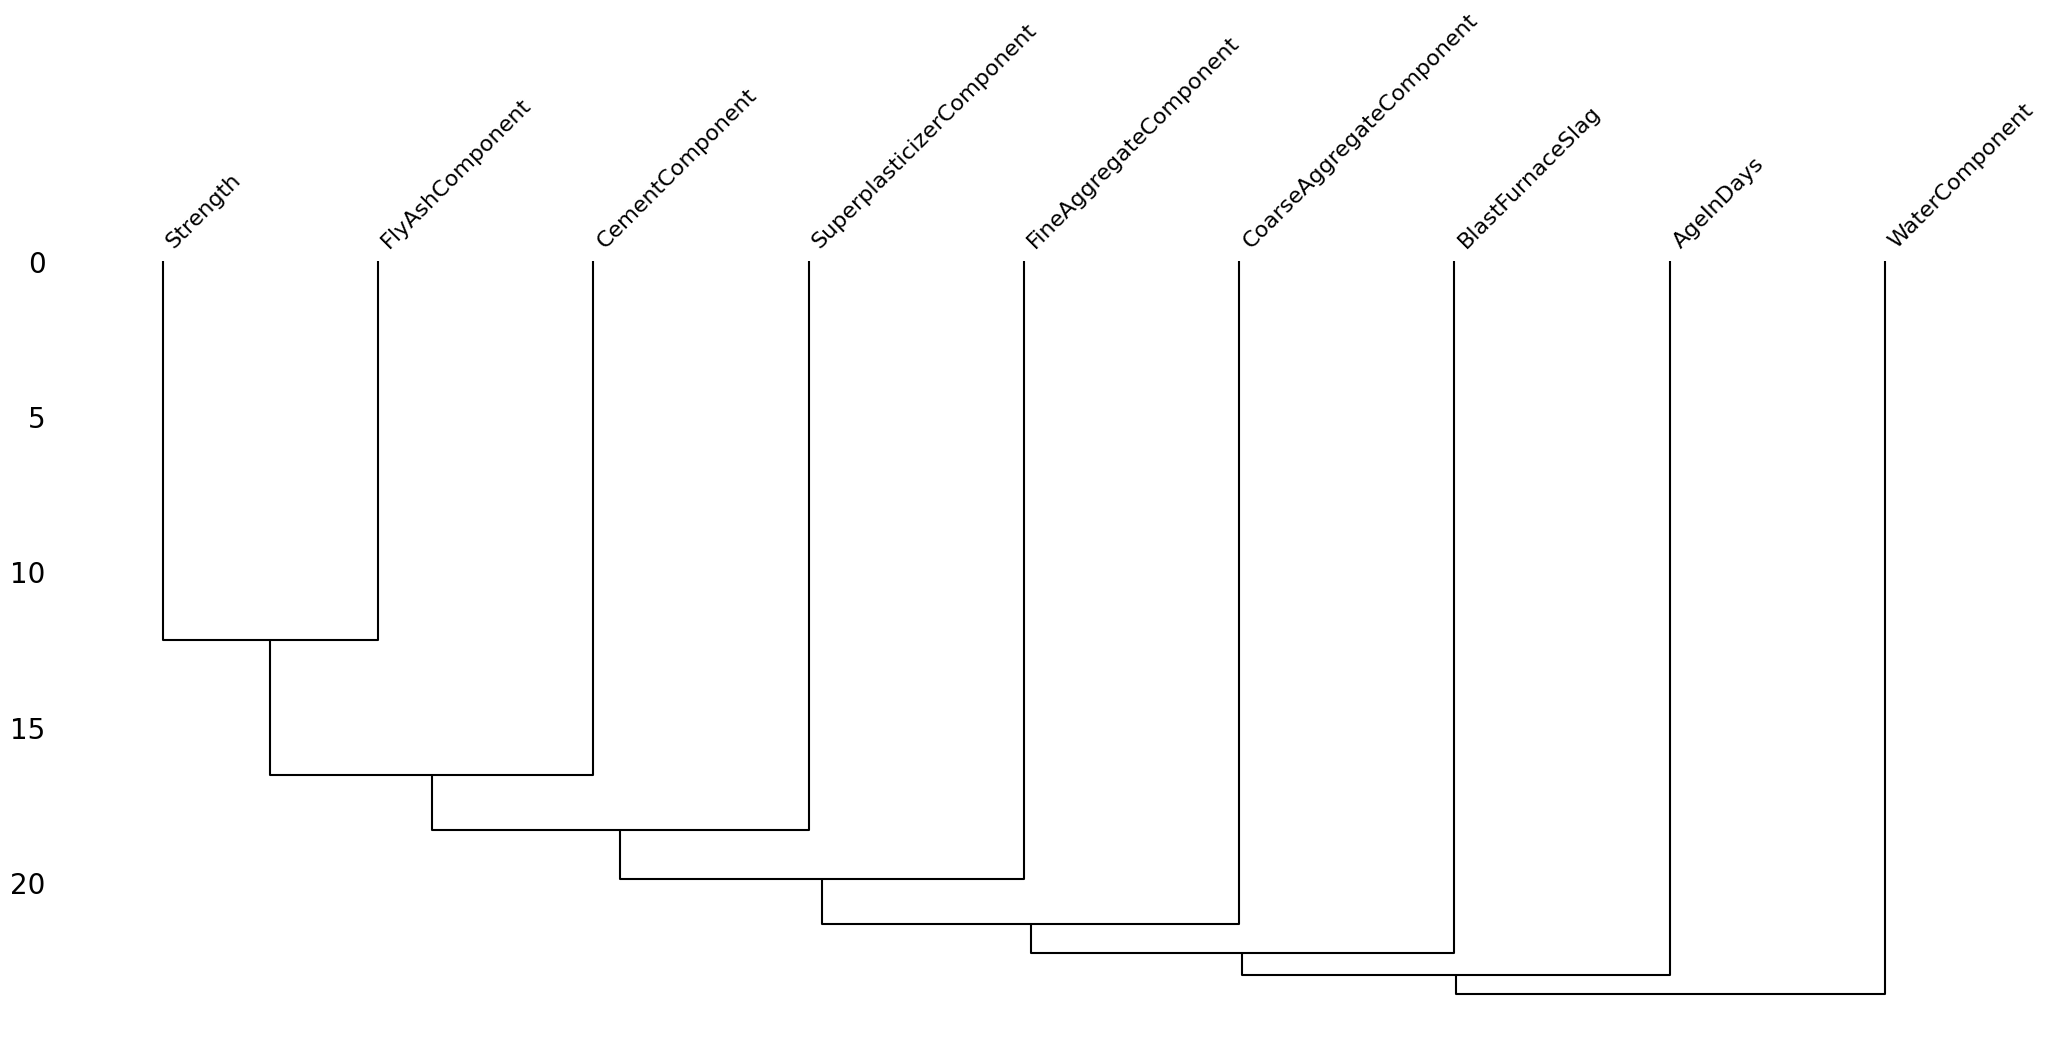

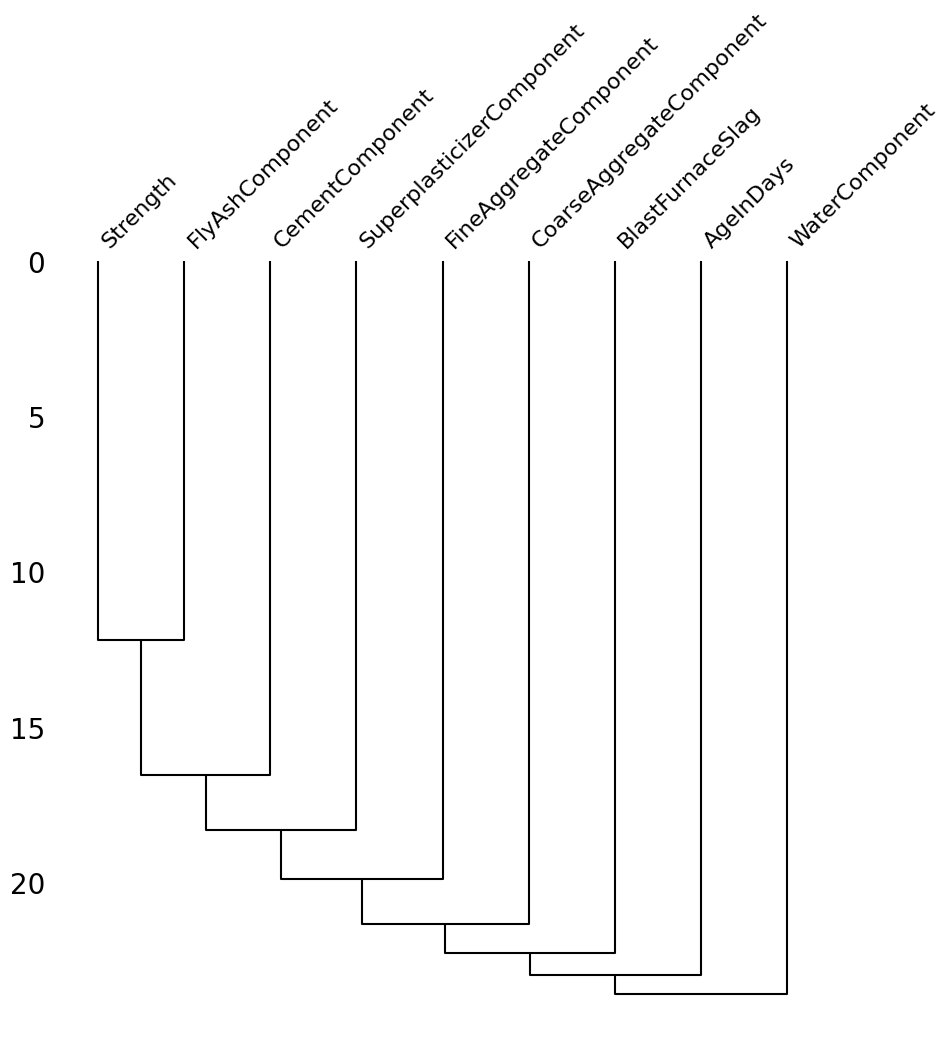

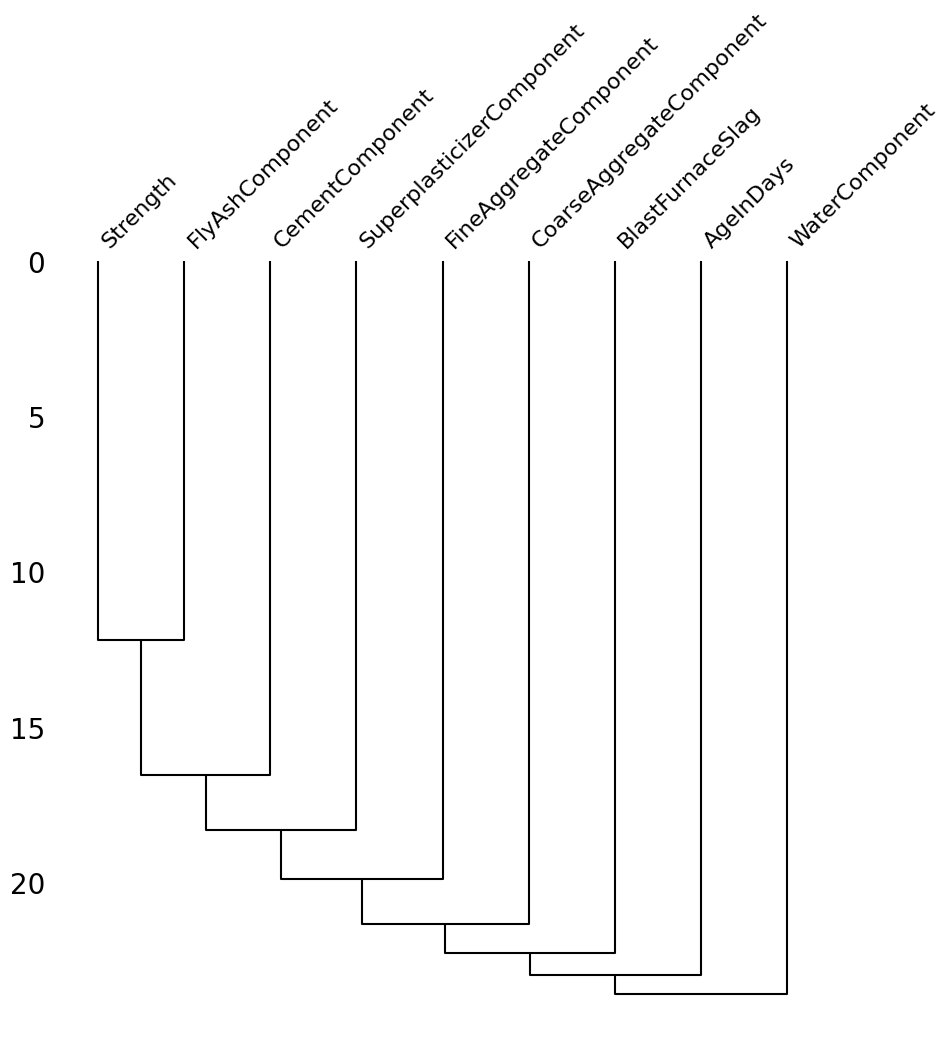

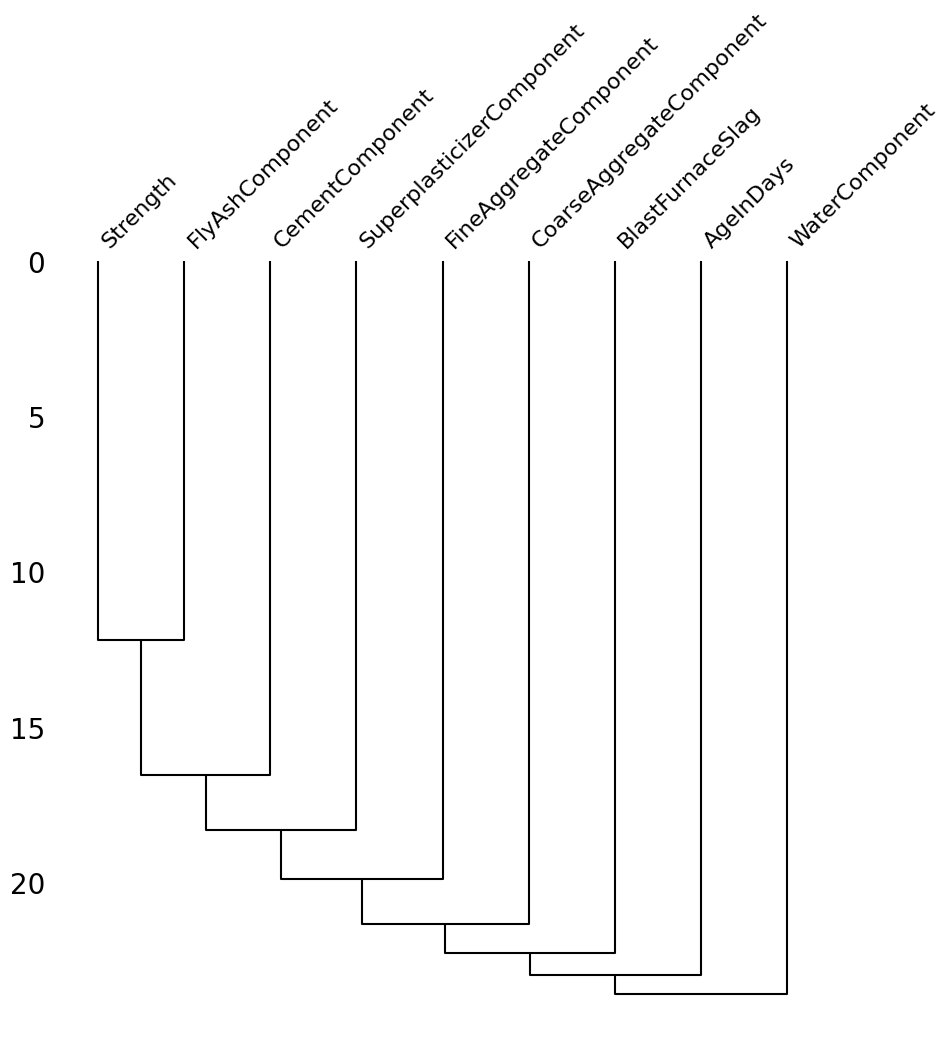

In [12]:
import missingno as msno

msno.bar(df)
msno.matrix(df)
msno.heatmap(df)
msno.dendrogram(df)
msno.dendrogram(df, figsize=(10, 10))
msno.dendrogram(df, figsize=(10, 10))
msno.dendrogram(df, figsize=(10, 10))


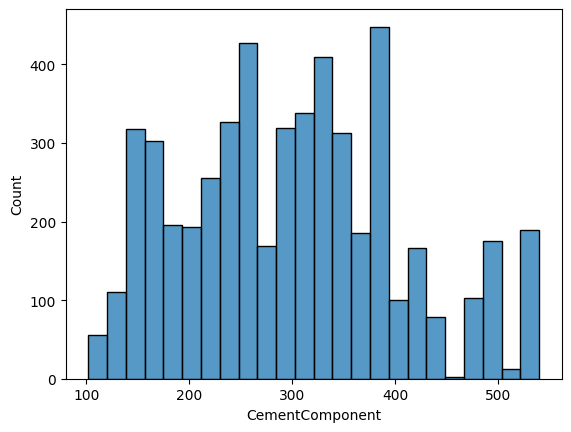

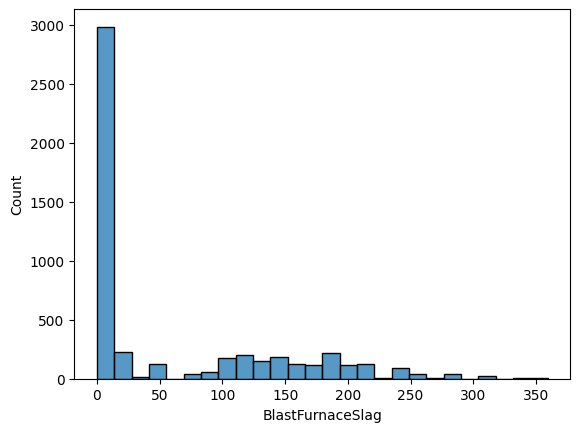

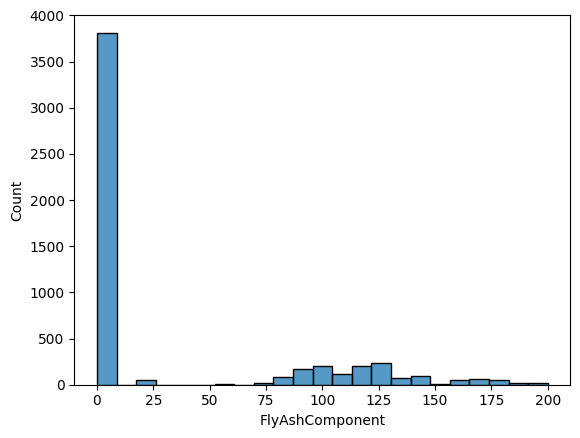

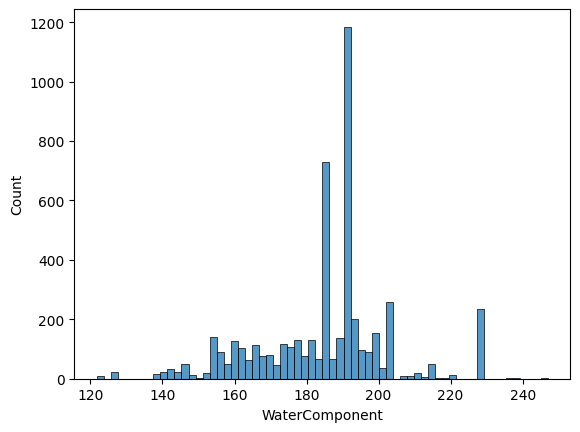

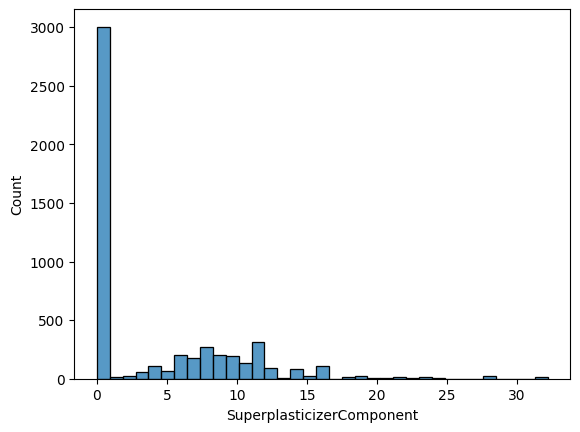

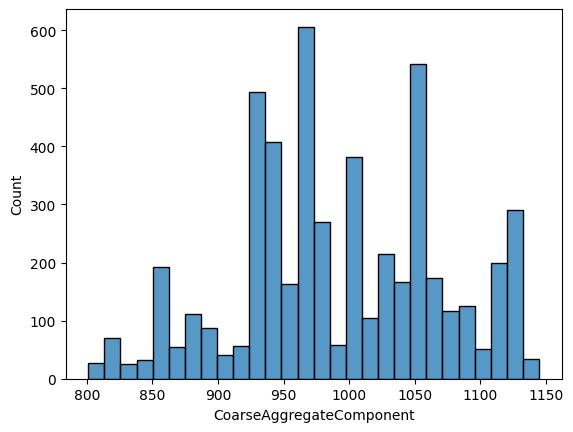

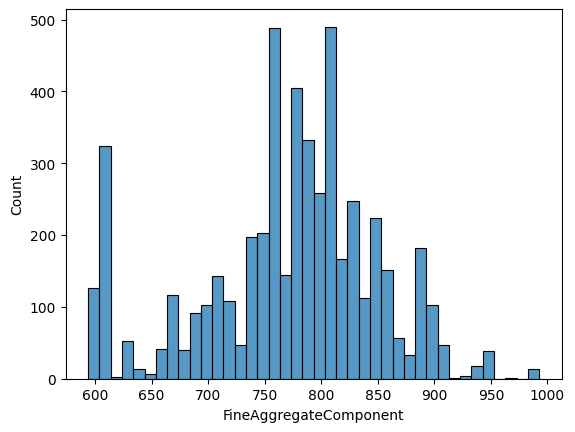

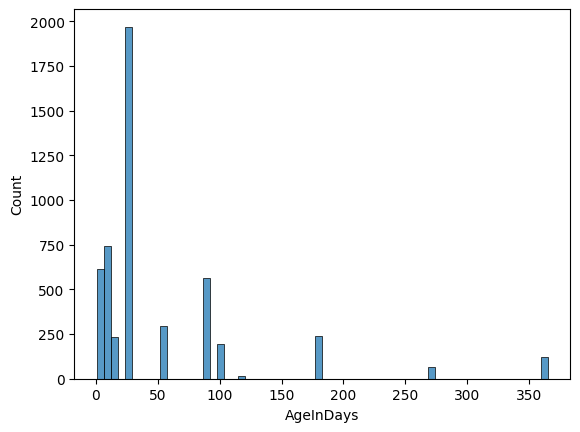

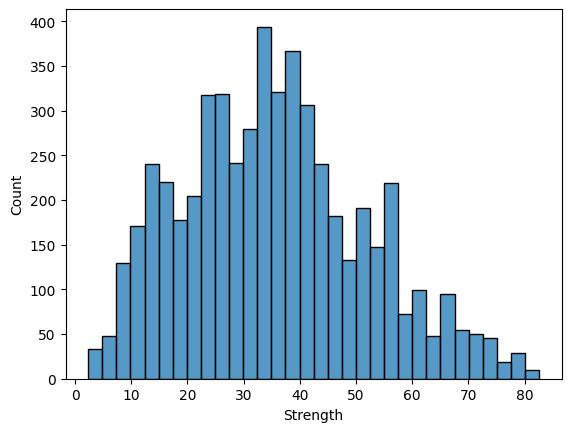

In [13]:
# histogram for each feature
for feature in df.columns:
    sns.histplot(df[feature])
    plt.show()


try to impute with knn

In [14]:
from sklearn.impute import KNNImputer

# copy dataframe and run KNN imputation
df_imputed_knn = df.copy()
imputer = KNNImputer(n_neighbors=5, weights='distance')
df_imputed_knn = pd.DataFrame(imputer.fit_transform(df_imputed_knn),
                              columns=df.columns, index=df.index)

# save imputed copy
df_imputed_knn.to_csv("dataset_imputed_knn.csv", index=False)

# quick check
print("Missing before:\n", df.isnull().sum())
print("\nMissing after (KNN imputed):\n", df_imputed_knn.isnull().sum())

Missing before:
 CementComponent              213
BlastFurnaceSlag             328
FlyAshComponent              149
WaterComponent               363
SuperplasticizerComponent    229
CoarseAggregateComponent     312
FineAggregateComponent       274
AgeInDays                    345
Strength                       0
dtype: int64

Missing after (KNN imputed):
 CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateComponent     0
FineAggregateComponent       0
AgeInDays                    0
Strength                     0
dtype: int64


In [15]:
# median before and after
print("Median before:\n", df.median())
print("\nMedian after (KNN imputed):\n", df_imputed_knn.median())

Median before:
 CementComponent              297.20
BlastFurnaceSlag               0.00
FlyAshComponent                0.00
WaterComponent               187.40
SuperplasticizerComponent      0.00
CoarseAggregateComponent     978.00
FineAggregateComponent       781.20
AgeInDays                     28.00
Strength                      33.95
dtype: float64

Median after (KNN imputed):
 CementComponent              297.200000
BlastFurnaceSlag               0.000000
FlyAshComponent                0.000000
WaterComponent               188.448466
SuperplasticizerComponent      0.000000
CoarseAggregateComponent     978.000000
FineAggregateComponent       781.200000
AgeInDays                     28.000000
Strength                      33.950000
dtype: float64


OUTLIER ANALYSIS - Concrete Dataset

1. STATISTICAL SUMMARY
       CementComponent  BlastFurnaceSlag  FlyAshComponent  WaterComponent  \
count      5407.000000       5407.000000      5407.000000     5407.000000   
mean        299.030418         58.251910        31.895506      185.117472   
std         105.107863         82.576886        54.478730       18.346339   
min         102.000000          0.000000         0.000000      121.800000   
25%         213.700000          0.000000         0.000000      175.500000   
50%         297.200000          0.000000         0.000000      188.448466   
75%         375.000000        121.000000        79.000000      192.000000   
max         540.000000        359.400000       200.100000      247.000000   

       SuperplasticizerComponent  CoarseAggregateComponent  \
count                5407.000000               5407.000000   
mean                    4.100082                992.359368   
std                     5.664028                 76.453119  

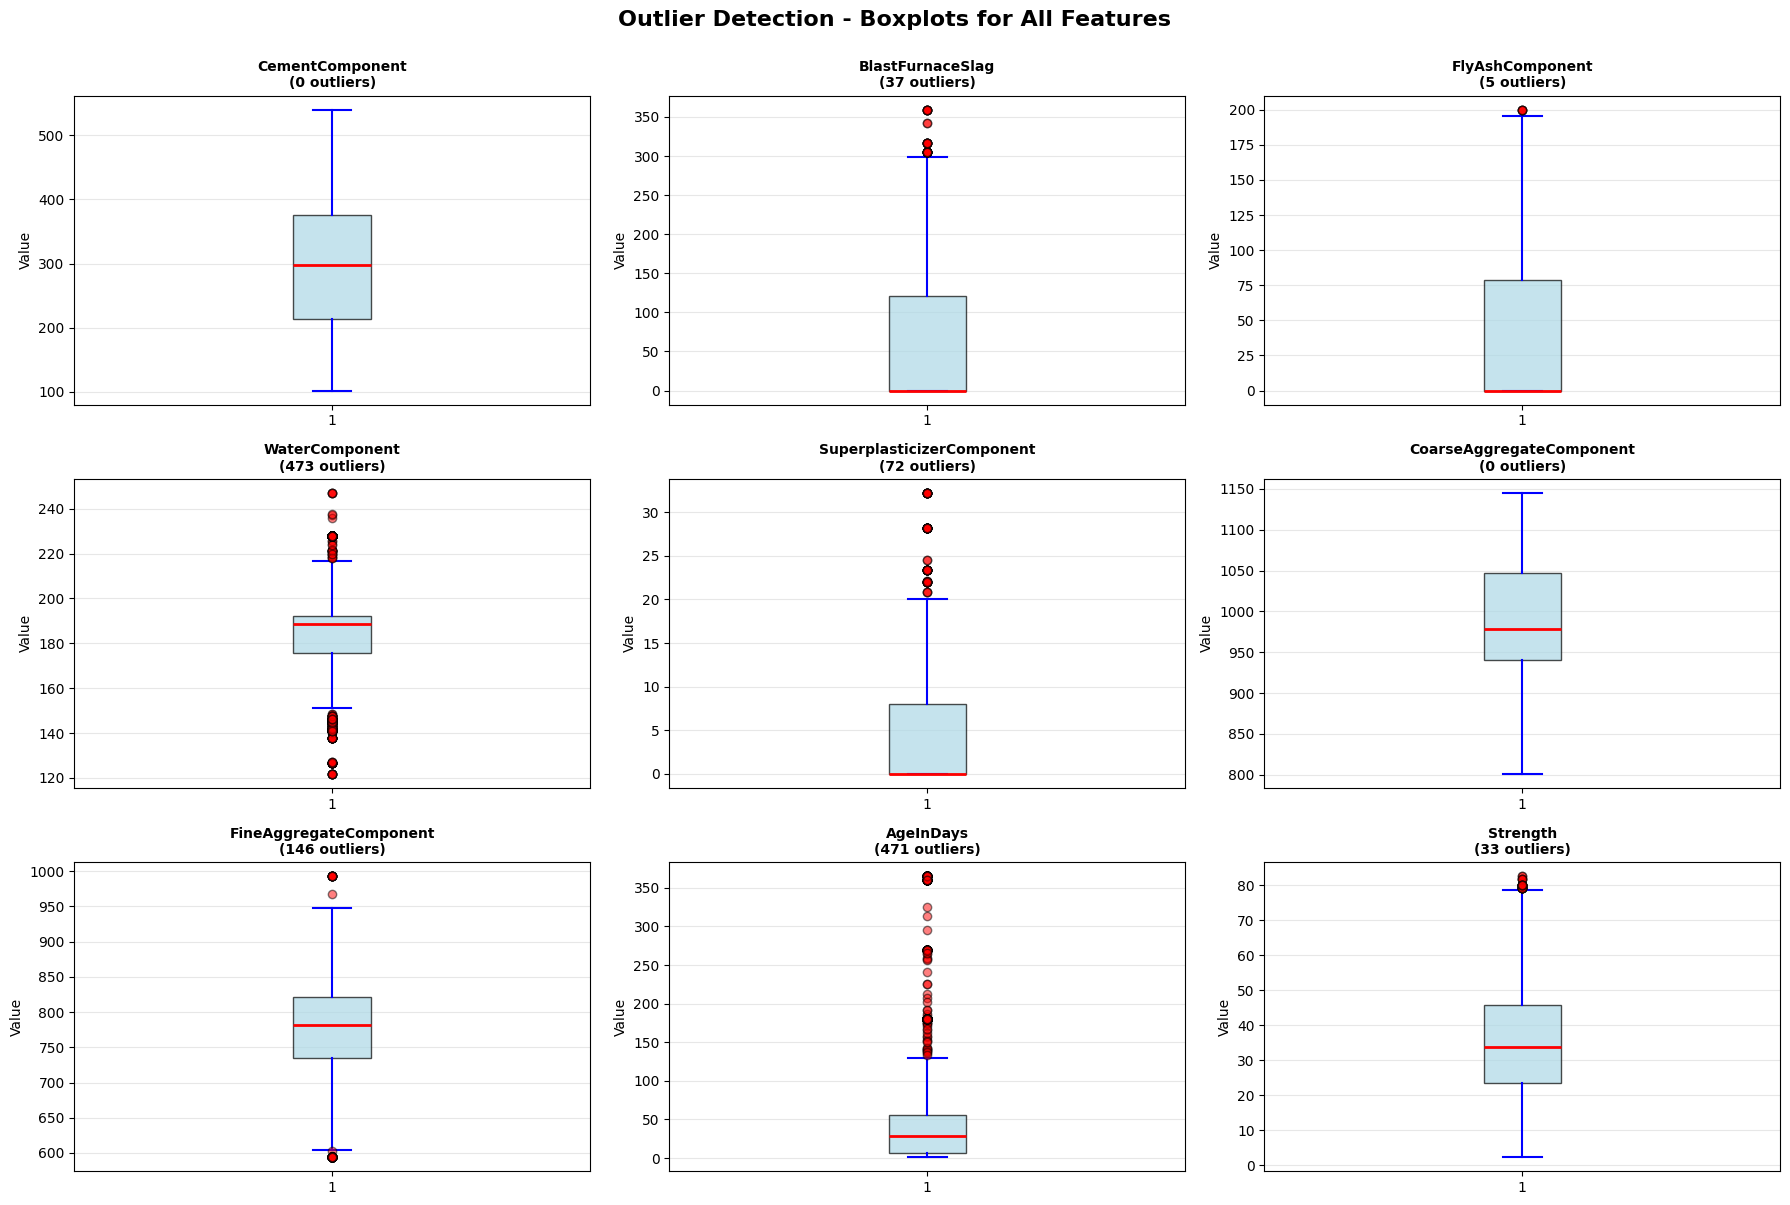


5. DISTRIBUTION ANALYSIS


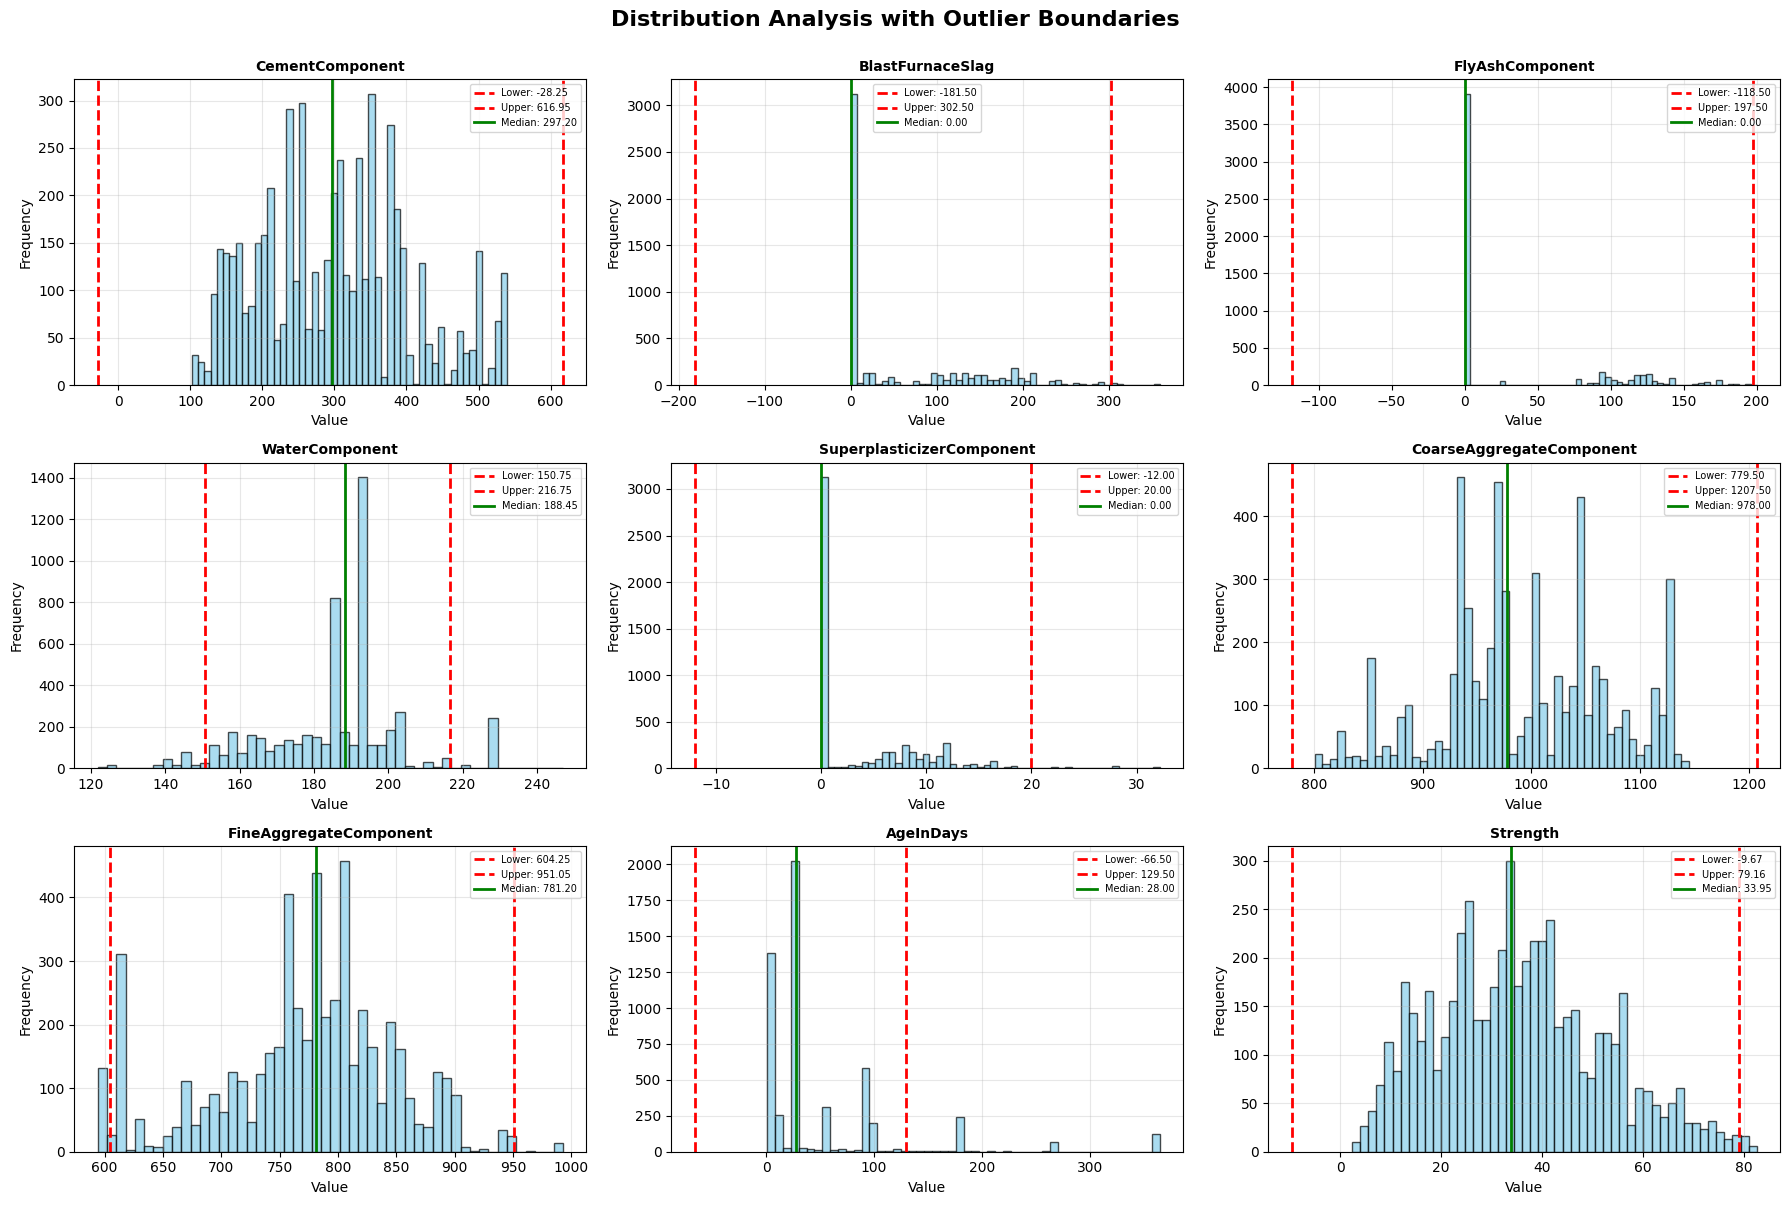


6. FEATURE vs STRENGTH (identifying influential outliers)


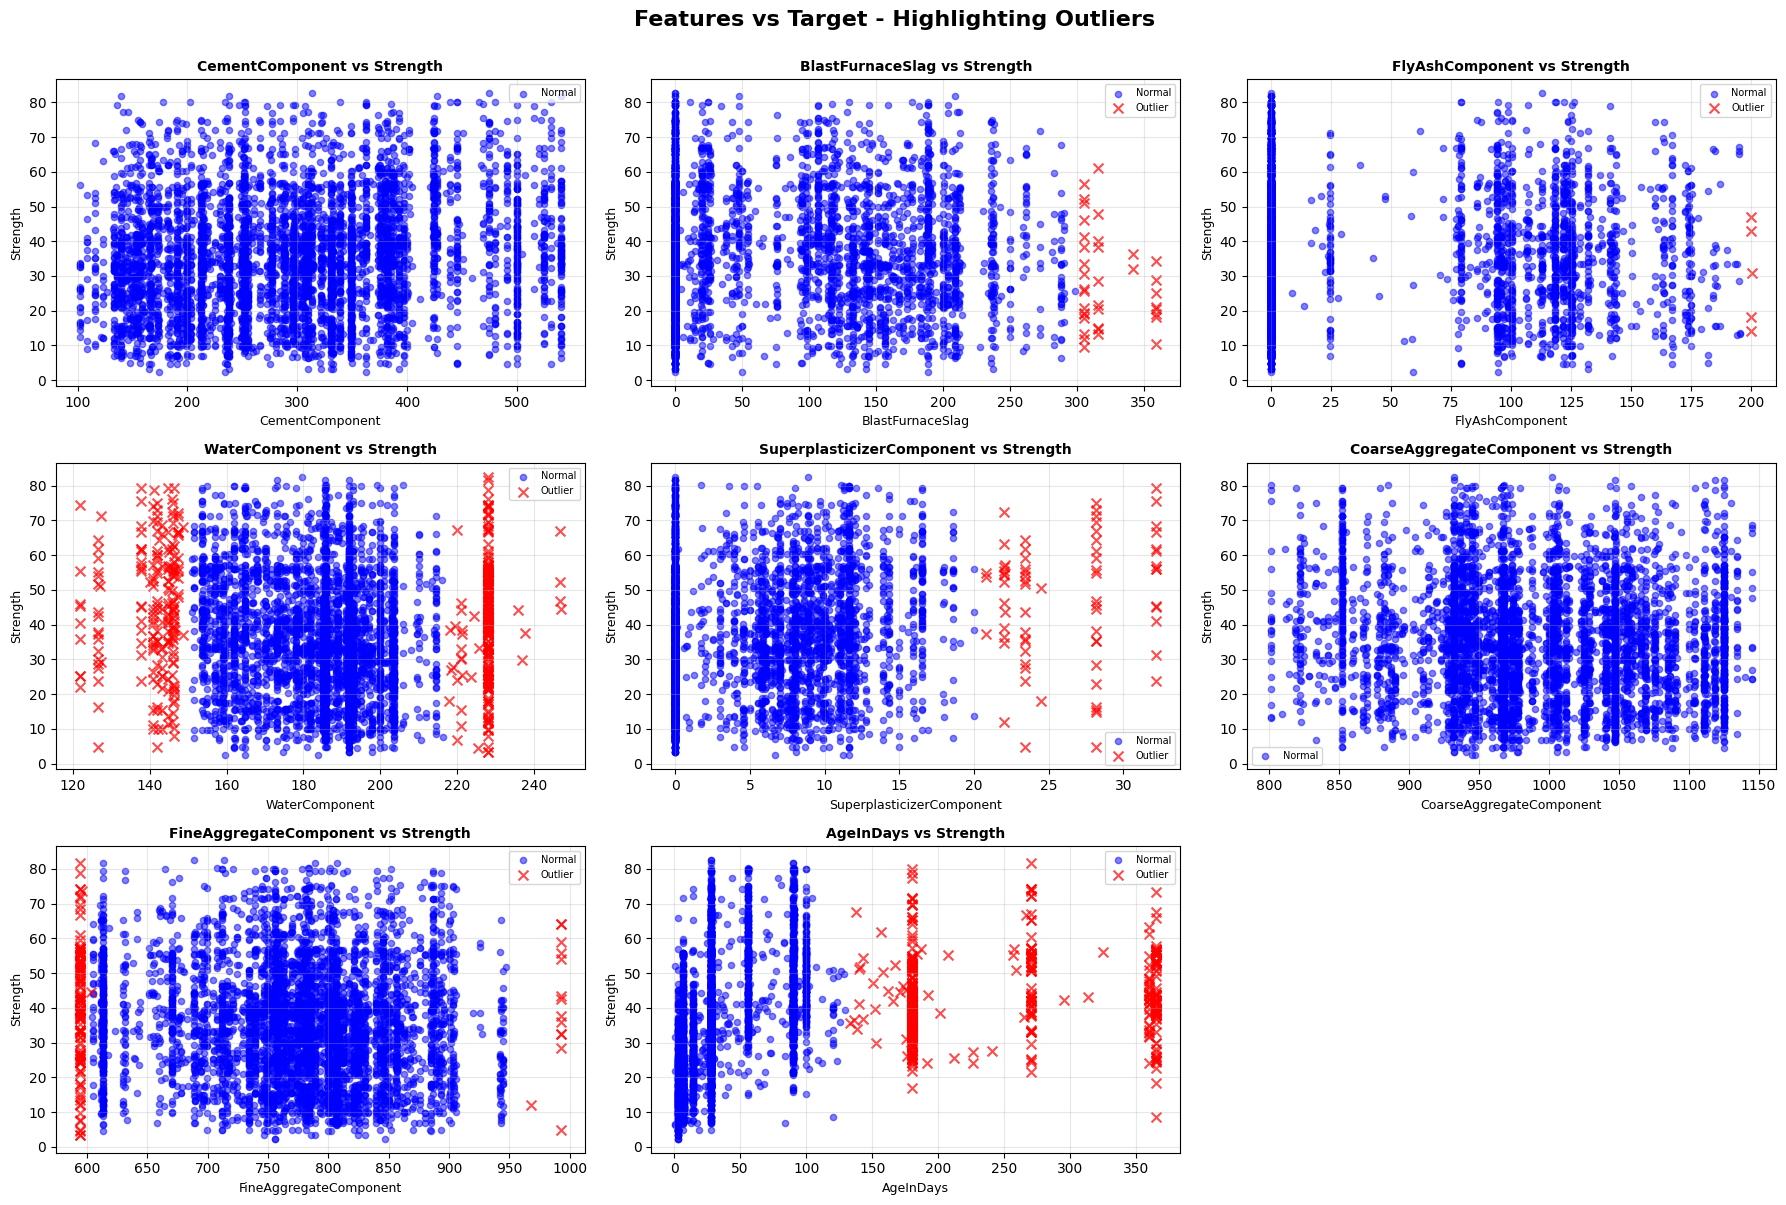


7. MULTIVARIATE OUTLIER DETECTION - Isolation Forest
Outliers detected by Isolation Forest: 541 (10.01%)


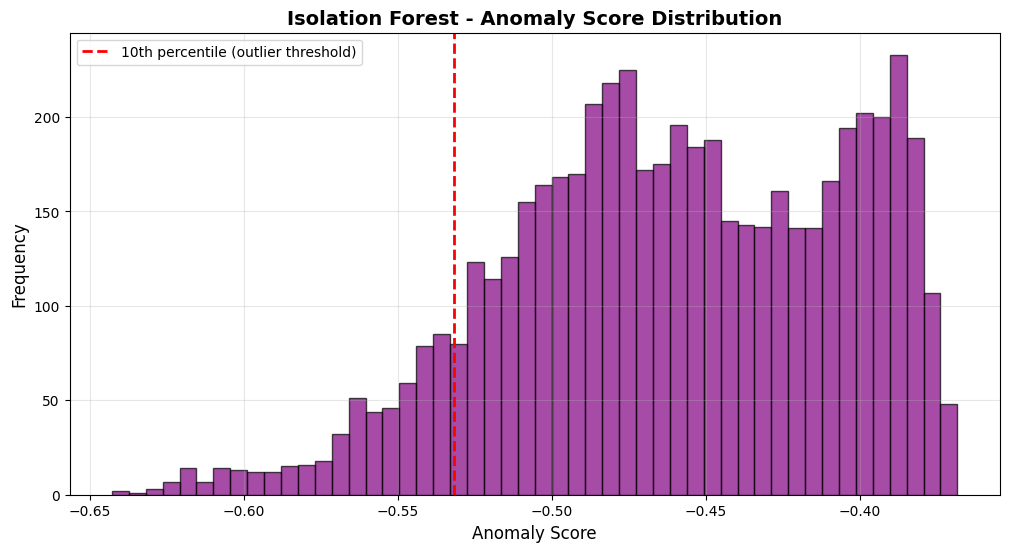


8. OUTLIER DETECTION SUMMARY
           Method  Outlier Rows Percentage
Z-Score (|z| > 3)           307      5.68%
    IQR (1.5*IQR)           912     16.87%
 Isolation Forest           541     10.01%

9. CREATING CLEANED DATASETS
Original dataset: 5407 rows
Dataset without IQR outliers: 4495 rows (removed 912 rows)
Dataset without Isolation Forest outliers: 4866 rows (removed 541 rows)

10. RECOMMENDATIONS

Based on the outlier analysis:

1. IQR Method: Most sensitive - detects feature-wise outliers
2. Z-Score: Conservative - only extreme statistical outliers
3. Isolation Forest: Detects multivariate outliers (anomalies in feature combinations)

NEXT STEPS:
✓ Created df_no_outliers_iqr (without IQR outliers)
✓ Created df_no_outliers_iso (without Isolation Forest outliers)

RECOMMENDATIONS:
- Test models on BOTH datasets (with and without outliers)
- Tree-based models (Random Forest, Gradient Boosting) handle outliers well
- Linear models are sensitive to outliers - consider using cle

In [16]:
# ANALISI OUTLIERS - Comprehensive Outlier Detection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import IsolationForest

print("="*70)
print("OUTLIER ANALYSIS - Concrete Dataset")
print("="*70)

# Use the imputed dataset
df_analysis = df_imputed_knn.copy()

# 1. STATISTICAL SUMMARY
print("\n" + "="*70)
print("1. STATISTICAL SUMMARY")
print("="*70)
print(df_analysis.describe())

# 2. Z-SCORE METHOD (outliers > 3 standard deviations)
print("\n" + "="*70)
print("2. Z-SCORE METHOD (|z| > 3)")
print("="*70)

z_scores = pd.DataFrame(np.abs(stats.zscore(df_analysis)), columns=df_analysis.columns, index=df_analysis.index)
outliers_zscore = (z_scores > 3)

print("\nOutliers per feature (Z-score > 3):")
for col in df_analysis.columns:
    count = outliers_zscore[col].sum()
    percentage = (count / len(df_analysis)) * 100
    print(f"{col:30s}: {count:4d} outliers ({percentage:5.2f}%)")

print(f"\nTotal outlier data points: {outliers_zscore.sum().sum()}")
rows_with_outliers = outliers_zscore.any(axis=1).sum()
print(f"Rows containing at least one outlier: {rows_with_outliers} ({rows_with_outliers/len(df_analysis)*100:.2f}%)")

# 3. IQR METHOD (Interquartile Range)
print("\n" + "="*70)
print("3. IQR METHOD (beyond 1.5*IQR)")
print("="*70)

outliers_iqr = pd.DataFrame(index=df_analysis.index)
outliers_count_iqr = {}
iqr_bounds = {}

for col in df_analysis.columns:
    Q1 = df_analysis[col].quantile(0.25)
    Q3 = df_analysis[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_iqr[col] = (df_analysis[col] < lower_bound) | (df_analysis[col] > upper_bound)
    outliers_count_iqr[col] = outliers_iqr[col].sum()
    iqr_bounds[col] = (lower_bound, upper_bound)
    
    print(f"{col:30s}: {outliers_count_iqr[col]:4d} outliers ({outliers_count_iqr[col]/len(df_analysis)*100:5.2f}%) "
          f"[{lower_bound:8.2f}, {upper_bound:8.2f}]")

rows_with_outliers_iqr = outliers_iqr.any(axis=1).sum()
print(f"\nRows containing at least one outlier: {rows_with_outliers_iqr} ({rows_with_outliers_iqr/len(df_analysis)*100:.2f}%)")

# 4. VISUALIZATION - BOXPLOTS
print("\n" + "="*70)
print("4. BOXPLOT VISUALIZATION")
print("="*70)

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, col in enumerate(df_analysis.columns):
    ax = axes[idx]
    bp = ax.boxplot(df_analysis[col], vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', alpha=0.7),
                    medianprops=dict(color='red', linewidth=2),
                    whiskerprops=dict(color='blue', linewidth=1.5),
                    capprops=dict(color='blue', linewidth=1.5),
                    flierprops=dict(marker='o', markerfacecolor='red', markersize=6, alpha=0.5))
    
    ax.set_title(f'{col}\n({outliers_count_iqr[col]} outliers)', fontsize=10, fontweight='bold')
    ax.set_ylabel('Value')
    ax.grid(axis='y', alpha=0.3)

plt.suptitle('Outlier Detection - Boxplots for All Features', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# 5. HISTOGRAM + DISTRIBUTION
print("\n" + "="*70)
print("5. DISTRIBUTION ANALYSIS")
print("="*70)

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, col in enumerate(df_analysis.columns):
    ax = axes[idx]
    
    # Histogram
    ax.hist(df_analysis[col], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    
    # Get bounds
    lower_bound, upper_bound = iqr_bounds[col]
    
    ax.axvline(lower_bound, color='red', linestyle='--', linewidth=2, label=f'Lower: {lower_bound:.2f}')
    ax.axvline(upper_bound, color='red', linestyle='--', linewidth=2, label=f'Upper: {upper_bound:.2f}')
    ax.axvline(df_analysis[col].median(), color='green', linestyle='-', linewidth=2, label=f'Median: {df_analysis[col].median():.2f}')
    
    ax.set_title(f'{col}', fontsize=10, fontweight='bold')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.legend(fontsize=7)
    ax.grid(alpha=0.3)

plt.suptitle('Distribution Analysis with Outlier Boundaries', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# 6. SCATTER PLOTS - Outliers vs Strength
print("\n" + "="*70)
print("6. FEATURE vs STRENGTH (identifying influential outliers)")
print("="*70)

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, col in enumerate(df_analysis.columns):
    if col == 'Strength':
        axes[idx].axis('off')
        continue
    
    ax = axes[idx]
    
    # Regular points
    mask_normal = ~outliers_iqr[col]
    ax.scatter(df_analysis.loc[mask_normal, col], 
              df_analysis.loc[mask_normal, 'Strength'],
              alpha=0.5, s=20, c='blue', label='Normal')
    
    # Outlier points
    mask_outlier = outliers_iqr[col]
    if mask_outlier.sum() > 0:
        ax.scatter(df_analysis.loc[mask_outlier, col], 
                  df_analysis.loc[mask_outlier, 'Strength'],
                  alpha=0.7, s=50, c='red', marker='x', label='Outlier')
    
    ax.set_xlabel(col, fontsize=9)
    ax.set_ylabel('Strength', fontsize=9)
    ax.set_title(f'{col} vs Strength', fontsize=10, fontweight='bold')
    ax.legend(fontsize=7)
    ax.grid(alpha=0.3)

plt.suptitle('Features vs Target - Highlighting Outliers', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# 7. MULTIVARIATE OUTLIERS - Isolation Forest
print("\n" + "="*70)
print("7. MULTIVARIATE OUTLIER DETECTION - Isolation Forest")
print("="*70)

# Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outliers_iso = iso_forest.fit_predict(df_analysis)
outliers_iso_mask = outliers_iso == -1

print(f"Outliers detected by Isolation Forest: {outliers_iso_mask.sum()} ({outliers_iso_mask.sum()/len(df_analysis)*100:.2f}%)")

# Visualize anomaly scores
anomaly_scores = iso_forest.score_samples(df_analysis)
plt.figure(figsize=(12, 6))
plt.hist(anomaly_scores, bins=50, alpha=0.7, color='purple', edgecolor='black')
plt.axvline(np.percentile(anomaly_scores, 10), color='red', linestyle='--', linewidth=2, label='10th percentile (outlier threshold)')
plt.xlabel('Anomaly Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Isolation Forest - Anomaly Score Distribution', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 8. SUMMARY TABLE
print("\n" + "="*70)
print("8. OUTLIER DETECTION SUMMARY")
print("="*70)

summary_data = {
    'Method': ['Z-Score (|z| > 3)', 'IQR (1.5*IQR)', 'Isolation Forest'],
    'Outlier Rows': [rows_with_outliers, rows_with_outliers_iqr, outliers_iso_mask.sum()],
    'Percentage': [
        f"{rows_with_outliers/len(df_analysis)*100:.2f}%",
        f"{rows_with_outliers_iqr/len(df_analysis)*100:.2f}%",
        f"{outliers_iso_mask.sum()/len(df_analysis)*100:.2f}%"
    ]
}

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

# 9. CREATE DATASETS WITH/WITHOUT OUTLIERS
print("\n" + "="*70)
print("9. CREATING CLEANED DATASETS")
print("="*70)

# Dataset without IQR outliers
df_no_outliers_iqr = df_analysis[~outliers_iqr.any(axis=1)].copy()
print(f"Original dataset: {len(df_analysis)} rows")
print(f"Dataset without IQR outliers: {len(df_no_outliers_iqr)} rows (removed {len(df_analysis) - len(df_no_outliers_iqr)} rows)")

# Dataset without Isolation Forest outliers
df_no_outliers_iso = df_analysis[~outliers_iso_mask].copy()
print(f"Dataset without Isolation Forest outliers: {len(df_no_outliers_iso)} rows (removed {len(df_analysis) - len(df_no_outliers_iso)} rows)")

# 10. RECOMMENDATION
print("\n" + "="*70)
print("10. RECOMMENDATIONS")
print("="*70)
print("""
Based on the outlier analysis:

1. IQR Method: Most sensitive - detects feature-wise outliers
2. Z-Score: Conservative - only extreme statistical outliers
3. Isolation Forest: Detects multivariate outliers (anomalies in feature combinations)

NEXT STEPS:
✓ Created df_no_outliers_iqr (without IQR outliers)
✓ Created df_no_outliers_iso (without Isolation Forest outliers)

RECOMMENDATIONS:
- Test models on BOTH datasets (with and without outliers)
- Tree-based models (Random Forest, Gradient Boosting) handle outliers well
- Linear models are sensitive to outliers - consider using cleaned data
- Consider capping extreme values instead of removing them
""")

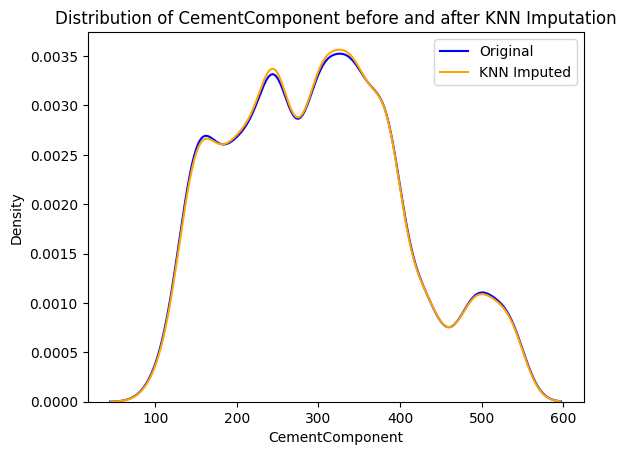

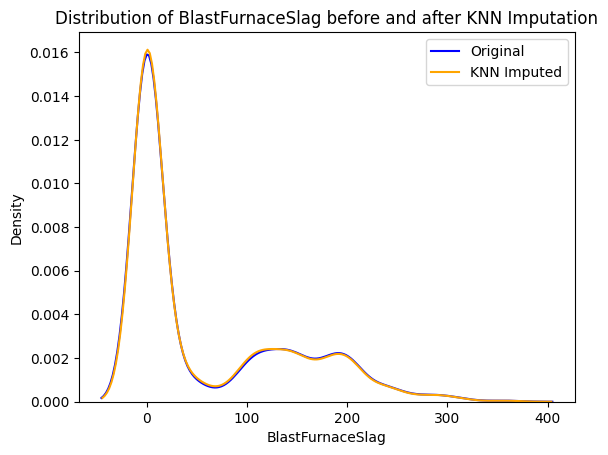

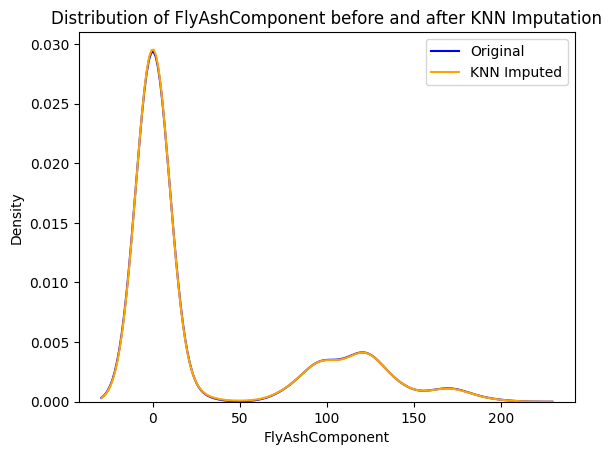

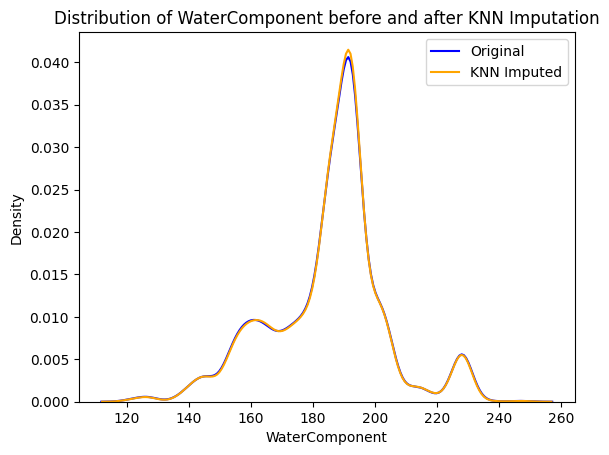

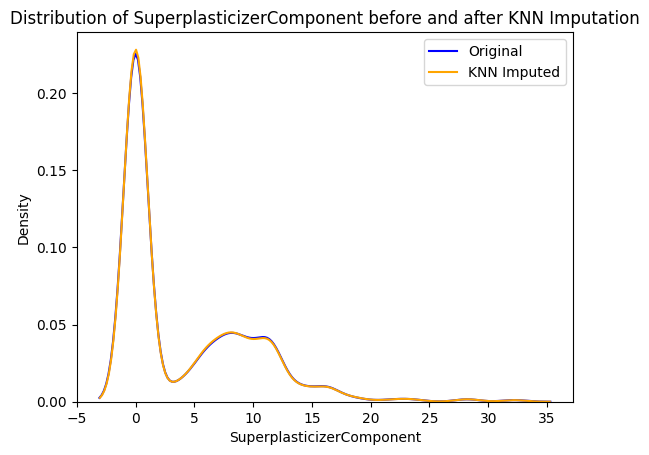

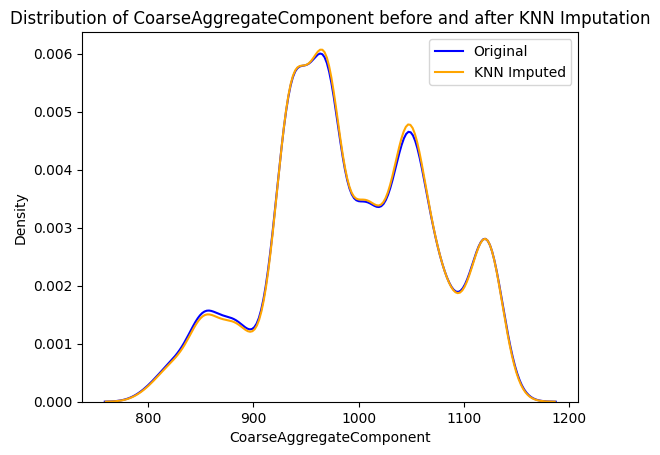

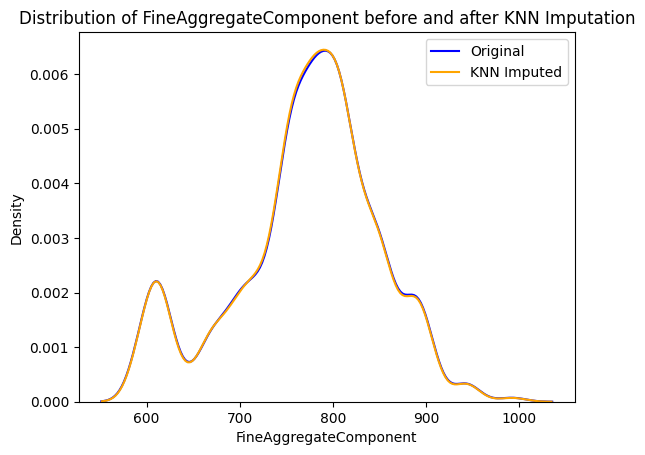

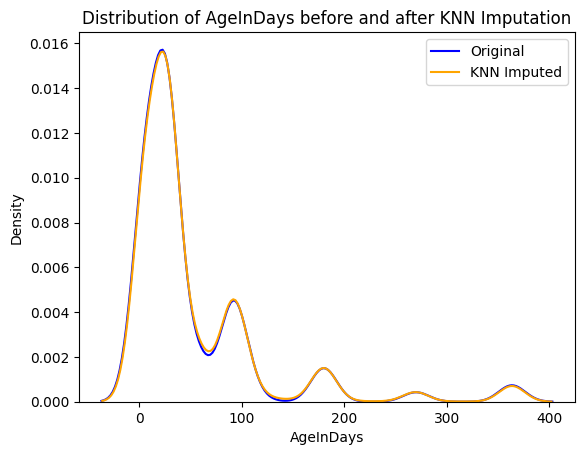

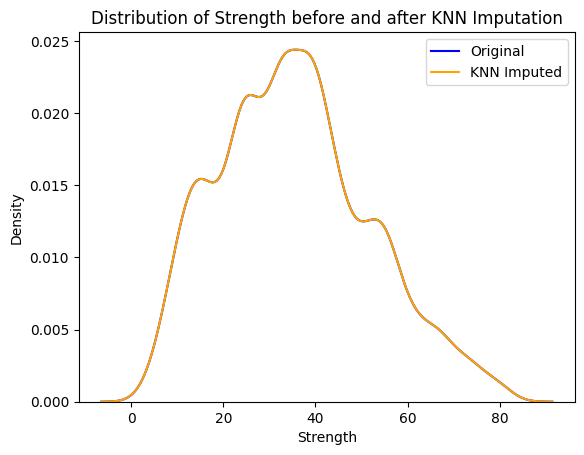

In [17]:
# check distributions before and after imputation
for feature in df.columns:
    sns.kdeplot(df[feature], label='Original', color='blue')
    sns.kdeplot(df_imputed_knn[feature], label='KNN Imputed', color='orange')
    plt.title(f'Distribution of {feature} before and after KNN Imputation')
    plt.legend()
    plt.show()

# Feature engineering:

Creating engineered features...
Original features: 9
Engineered features: 44
New features created: 35

New features list:
1. Water_Cement_Ratio
2. Total_Binder
3. Water_Binder_Ratio
4. Fine_Coarse_Ratio
5. Plasticizer_Cement_Ratio
6. SCM_Cement_Ratio
7. Total_Aggregate
8. Total_Weight
9. Paste_Volume
10. Cement_Percentage
11. Water_Percentage
12. Aggregate_Percentage
13. Binder_Percentage
14. Age_Log
15. Age_Sqrt
16. Age_Squared
17. Age_Cubed
18. Age_Young
19. Age_Medium
20. Age_Old
21. Has_FlyAsh
22. Has_BlastFurnace
23. Has_Plasticizer
24. Cement_Age_Interaction
25. Water_Age_Interaction
26. Binder_Age_Interaction
27. WC_Age_Interaction
28. Cement_Squared
29. Water_Squared
30. WC_Ratio_Squared
31. Aggregate_Density
32. Binder_Efficiency
33. Total_SCM
34. SCM_Percentage
35. FlyAsh_BlastFurnace_Ratio

CORRELATION OF NEW FEATURES WITH STRENGTH (Top 15)
Binder_Age_Interaction    0.582406
Age_Log                   0.553642
Water_Age_Interaction     0.474287
Cement_Age_Interaction    0.473

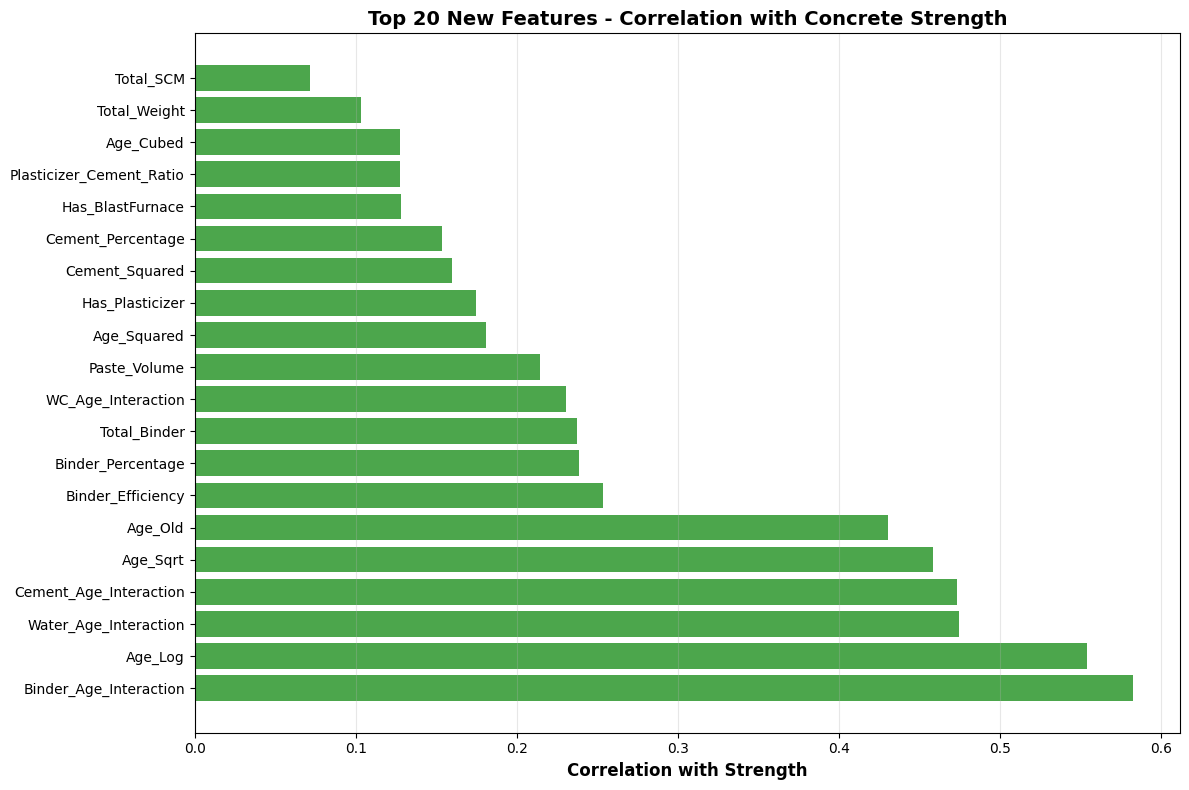

In [18]:
# Feature Engineering - Create new features for concrete strength prediction
import numpy as np
import pandas as pd

# Start with the imputed dataset
df_engineered = df_imputed_knn.copy()

print("Creating engineered features...")
print(f"Original features: {df_engineered.shape[1]}")

# 1. RAPPORTI TRA COMPONENTI (cruciali per la chimica del calcestruzzo)
# Water-to-Cement ratio (W/C) - uno dei fattori più importanti per la resistenza
df_engineered['Water_Cement_Ratio'] = df_engineered['WaterComponent'] / (df_engineered['CementComponent'] + 1e-10)

# Total Binder (materiali cementizi totali)
df_engineered['Total_Binder'] = (df_engineered['CementComponent'] + 
                                  df_engineered['BlastFurnaceSlag'] + 
                                  df_engineered['FlyAshComponent'])

# Water-to-Binder ratio (W/B)
df_engineered['Water_Binder_Ratio'] = df_engineered['WaterComponent'] / (df_engineered['Total_Binder'] + 1e-10)

# Fine-to-Coarse Aggregate ratio
df_engineered['Fine_Coarse_Ratio'] = df_engineered['FineAggregateComponent'] / (df_engineered['CoarseAggregateComponent'] + 1e-10)

# Superplasticizer-to-Cement ratio
df_engineered['Plasticizer_Cement_Ratio'] = df_engineered['SuperplasticizerComponent'] / (df_engineered['CementComponent'] + 1e-10)

# Supplementary Cementitious Materials (SCM) to Cement ratio
df_engineered['SCM_Cement_Ratio'] = (df_engineered['BlastFurnaceSlag'] + df_engineered['FlyAshComponent']) / (df_engineered['CementComponent'] + 1e-10)

# 2. SOMME E TOTALI
# Total Aggregate
df_engineered['Total_Aggregate'] = df_engineered['CoarseAggregateComponent'] + df_engineered['FineAggregateComponent']

# Total Weight (peso totale mix)
df_engineered['Total_Weight'] = (df_engineered['CementComponent'] + 
                                  df_engineered['BlastFurnaceSlag'] + 
                                  df_engineered['FlyAshComponent'] + 
                                  df_engineered['WaterComponent'] + 
                                  df_engineered['SuperplasticizerComponent'] + 
                                  df_engineered['CoarseAggregateComponent'] + 
                                  df_engineered['FineAggregateComponent'])

# Paste Volume (rapporto pasta cementizia vs aggregati)
df_engineered['Paste_Volume'] = (df_engineered['Total_Binder'] + df_engineered['WaterComponent']) / (df_engineered['Total_Weight'] + 1e-10)

# 3. PERCENTUALI (composizione del mix)
df_engineered['Cement_Percentage'] = df_engineered['CementComponent'] / (df_engineered['Total_Weight'] + 1e-10) * 100
df_engineered['Water_Percentage'] = df_engineered['WaterComponent'] / (df_engineered['Total_Weight'] + 1e-10) * 100
df_engineered['Aggregate_Percentage'] = df_engineered['Total_Aggregate'] / (df_engineered['Total_Weight'] + 1e-10) * 100
df_engineered['Binder_Percentage'] = df_engineered['Total_Binder'] / (df_engineered['Total_Weight'] + 1e-10) * 100

# 4. FEATURE TEMPORALI (età del calcestruzzo)
# La resistenza del calcestruzzo cresce in modo logaritmico nel tempo
df_engineered['Age_Log'] = np.log1p(df_engineered['AgeInDays'])  # log(1 + x) per gestire 0
df_engineered['Age_Sqrt'] = np.sqrt(df_engineered['AgeInDays'])
df_engineered['Age_Squared'] = df_engineered['AgeInDays'] ** 2
df_engineered['Age_Cubed'] = df_engineered['AgeInDays'] ** 3

# Binning dell'età (categorizzazione)
df_engineered['Age_Young'] = (df_engineered['AgeInDays'] <= 7).astype(int)  # 0-7 giorni
df_engineered['Age_Medium'] = ((df_engineered['AgeInDays'] > 7) & (df_engineered['AgeInDays'] <= 28)).astype(int)  # 7-28 giorni
df_engineered['Age_Old'] = (df_engineered['AgeInDays'] > 28).astype(int)  # 28+ giorni

# 5. FEATURE BINARIE (presenza/assenza di componenti)
df_engineered['Has_FlyAsh'] = (df_engineered['FlyAshComponent'] > 0).astype(int)
df_engineered['Has_BlastFurnace'] = (df_engineered['BlastFurnaceSlag'] > 0).astype(int)
df_engineered['Has_Plasticizer'] = (df_engineered['SuperplasticizerComponent'] > 0).astype(int)

# 6. INTERAZIONI TRA COMPONENTI CHIAVE
# Cement x Age (il cemento guadagna resistenza nel tempo)
df_engineered['Cement_Age_Interaction'] = df_engineered['CementComponent'] * df_engineered['Age_Log']

# Water x Age
df_engineered['Water_Age_Interaction'] = df_engineered['WaterComponent'] * df_engineered['Age_Log']

# Binder x Age
df_engineered['Binder_Age_Interaction'] = df_engineered['Total_Binder'] * df_engineered['Age_Log']

# Water/Cement x Age
df_engineered['WC_Age_Interaction'] = df_engineered['Water_Cement_Ratio'] * df_engineered['Age_Log']

# 7. FEATURE QUADRATICHE (per catturare relazioni non lineari)
df_engineered['Cement_Squared'] = df_engineered['CementComponent'] ** 2
df_engineered['Water_Squared'] = df_engineered['WaterComponent'] ** 2
df_engineered['WC_Ratio_Squared'] = df_engineered['Water_Cement_Ratio'] ** 2

# 8. DENSITÀ E COMPATTEZZA
# Aggregate density
df_engineered['Aggregate_Density'] = df_engineered['Total_Aggregate'] / (df_engineered['Total_Weight'] + 1e-10)

# Binder efficiency (binder per unit of water)
df_engineered['Binder_Efficiency'] = df_engineered['Total_Binder'] / (df_engineered['WaterComponent'] + 1e-10)

# 9. COMBINAZIONI DI MATERIALI SUPPLEMENTARI
# Total SCM (Supplementary Cementitious Materials)
df_engineered['Total_SCM'] = df_engineered['BlastFurnaceSlag'] + df_engineered['FlyAshComponent']
df_engineered['SCM_Percentage'] = df_engineered['Total_SCM'] / (df_engineered['Total_Weight'] + 1e-10) * 100

# Fly Ash to Blast Furnace ratio
df_engineered['FlyAsh_BlastFurnace_Ratio'] = df_engineered['FlyAshComponent'] / (df_engineered['BlastFurnaceSlag'] + 1e-10)

print(f"Engineered features: {df_engineered.shape[1]}")
print(f"New features created: {df_engineered.shape[1] - df_imputed_knn.shape[1]}")
print("\nNew features list:")
new_features = [col for col in df_engineered.columns if col not in df_imputed_knn.columns]
for i, feat in enumerate(new_features, 1):
    print(f"{i}. {feat}")

# Visualize correlation of new features with Strength
print("\n" + "="*70)
print("CORRELATION OF NEW FEATURES WITH STRENGTH (Top 15)")
print("="*70)
new_features_corr = df_engineered[new_features + ['Strength']].corr()['Strength'].drop('Strength').sort_values(ascending=False)
print(new_features_corr.head(15))

# Visualize
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
top_features = new_features_corr.head(20)
colors = ['green' if x > 0 else 'red' for x in top_features.values]
plt.barh(range(len(top_features)), top_features.values, color=colors, alpha=0.7)
plt.yticks(range(len(top_features)), top_features.index)
plt.xlabel('Correlation with Strength', fontsize=12, fontweight='bold')
plt.title('Top 20 New Features - Correlation with Concrete Strength', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [19]:
# redo the correlation matrix
#plt.figure(figsize=(10, 8))
#sns.heatmap(df_engineered.corr(), annot=True, fmt=".2f", cmap='coolwarm')
#plt.title("Correlation Matrix after KNN Imputation") 

In [20]:
import xgboost as xgb

In [21]:
df_to_predict=df_engineered

c:\Users\PietroBoschini\OneDrive - Digital360\Desktop\Github Repos\concrete\concrete\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✓ XGBoost is available
✓ XGBoost added to model comparison

Training Decision Tree...
Mean Squared Error: 242.1952
Root Mean Squared Error: 15.5626
Mean Absolute Error: 11.8074
R^2 Score: 0.1100

Training Random Forest...
Mean Squared Error: 155.4517
Root Mean Squared Error: 12.4680
Mean Absolute Error: 9.8040
R^2 Score: 0.4287

Training Gradient Boosting...
Mean Squared Error: 140.6489
Root Mean Squared Error: 11.8595
Mean Absolute Error: 9.2451
R^2 Score: 0.4831

Training AdaBoost...
Mean Squared Error: 163.0480
Root Mean Squared Error: 12.7690
Mean Absolute Error: 10.2971
R^2 Score: 0.4008

Training Linear Regression...
Mean Squared Error: 146.6252
Root Mean Squared Error: 12.1089
Mean Absolute Error: 9.4344
R^2 Score: 0.4612

Training Ridge...
Mean Squared Error: 142.9932
Root Mean Squared Error: 11.9580
Mean Absolute Error: 9.3026
R^2 Score: 0.4745

Training Lasso...
Mean Squared Error: 146.4276
Root Mean Squared Error: 12.1007
Mean Absolute Error: 9.4294
R^2 Score: 0.4619

Traini

c:\Users\PietroBoschini\OneDrive - Digital360\Desktop\Github Repos\concrete\concrete\venv\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=8.65335e-28): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
c:\Users\PietroBoschini\OneDrive - Digital360\Desktop\Github Repos\concrete\concrete\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.379e+05, tolerance: 1.159e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\PietroBoschini\OneDrive - Digital360\Desktop\Github Repos\concrete\concrete\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

Mean Squared Error: 272.8774
Root Mean Squared Error: 16.5190
Mean Absolute Error: 13.4551
R^2 Score: -0.0028

Training KNN...
Mean Squared Error: 168.4489
Root Mean Squared Error: 12.9788
Mean Absolute Error: 10.2172
R^2 Score: 0.3810

Training XGBoost...
Mean Squared Error: 163.7250
Root Mean Squared Error: 12.7955
Mean Absolute Error: 9.9624
R^2 Score: 0.3983

MODEL COMPARISON - Sorted by R2 Score
            Model        MSE      RMSE       MAE  R2 Score
Gradient Boosting 140.648870 11.859548  9.245056  0.483135
            Ridge 142.993186 11.957976  9.302563  0.474520
       ElasticNet 146.396083 12.099425  9.429916  0.462014
            Lasso 146.427643 12.100729  9.429433  0.461898
Linear Regression 146.625164 12.108888  9.434383  0.461172
    Random Forest 155.451665 12.468026  9.804036  0.428736
         AdaBoost 163.047974 12.769024 10.297074  0.400821
          XGBoost 163.725006 12.795507  9.962441  0.398333
              KNN 168.448878 12.978786 10.217250  0.380973
    De

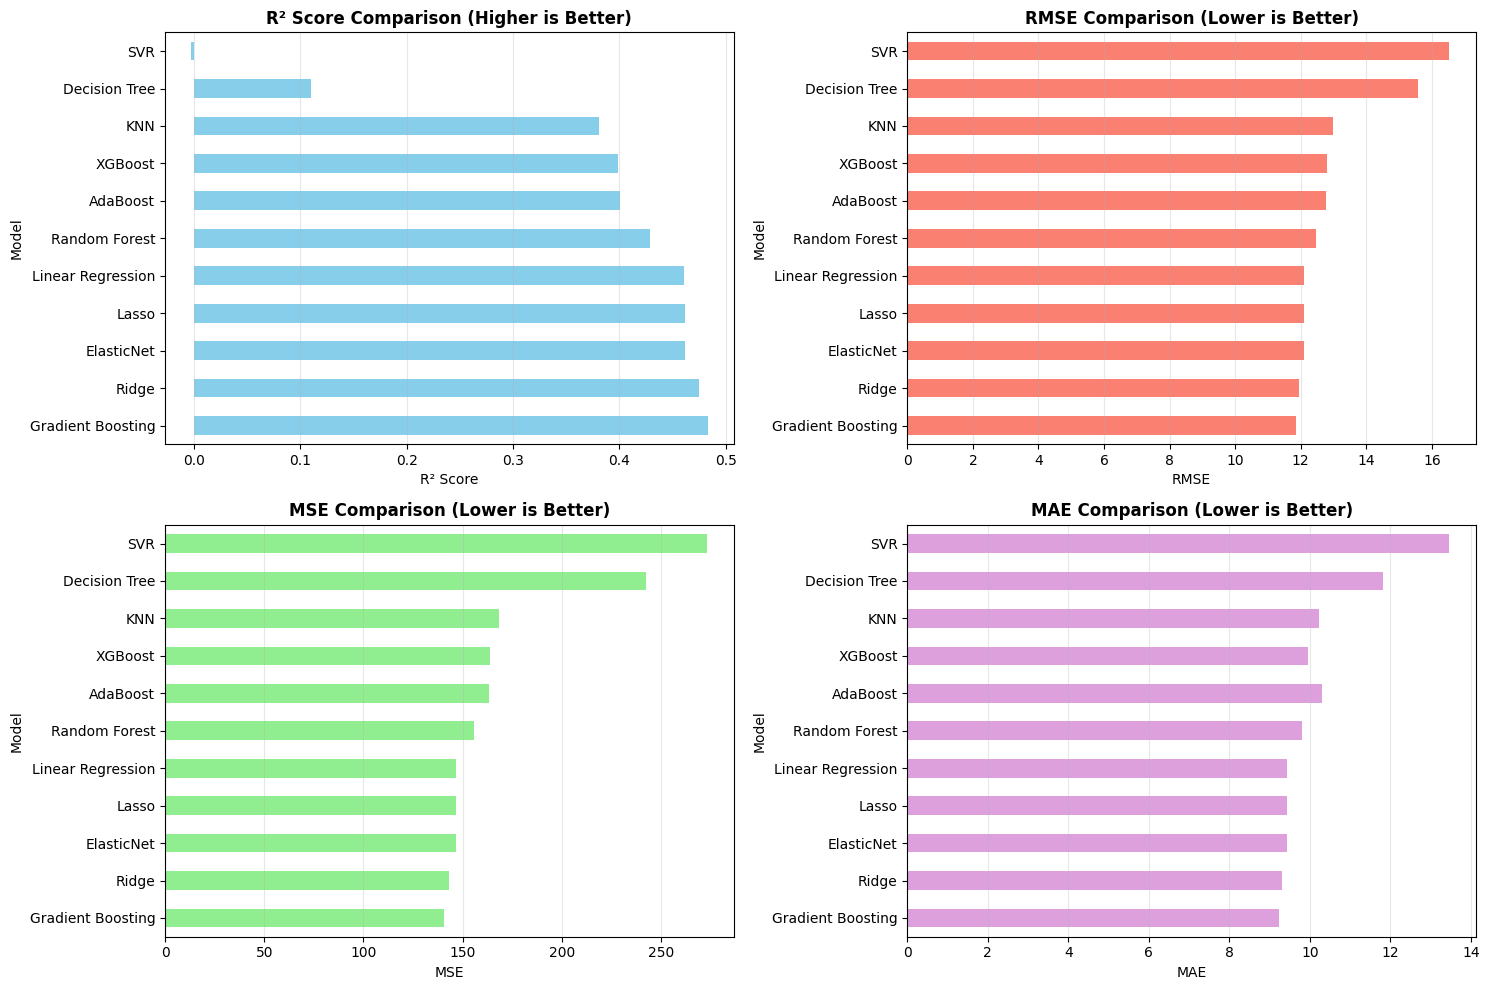

In [22]:
# Create different predictors using sklearn and compare results on MSE and R2 score and use SHAP to explain models
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import shap
import pandas as pd
import matplotlib.pyplot as plt

# Try to import XGBoost
try:
    import xgboost as xgb
    XGBOOST_AVAILABLE = True
    print("✓ XGBoost is available")
except ImportError:
    XGBOOST_AVAILABLE = False
    print("⚠ XGBoost not installed. Install with: pip install xgboost")

# Prepare data
X = df_to_predict.drop(columns=["Strength"])
y = df_to_predict["Strength"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models to compare
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42),
    'ElasticNet': ElasticNet(random_state=42),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

# Add XGBoost if available
if XGBOOST_AVAILABLE:
    models['XGBoost'] = xgb.XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
    print("✓ XGBoost added to model comparison")

# Store results
results = []

# Train and evaluate each model
for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Training {name}...")
    print(f"{'='*50}")
    
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results.append({
        'Model': name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2 Score': r2
    })
    
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R^2 Score: {r2:.4f}")

# Create comparison dataframe
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('R2 Score', ascending=False)
print("\n" + "="*70)
print("MODEL COMPARISON - Sorted by R2 Score")
print("="*70)
print(results_df.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# R2 Score comparison
results_df.plot(x='Model', y='R2 Score', kind='barh', ax=axes[0, 0], legend=False, color='skyblue')
axes[0, 0].set_title('R² Score Comparison (Higher is Better)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('R² Score')
axes[0, 0].grid(axis='x', alpha=0.3)

# RMSE comparison
results_df.plot(x='Model', y='RMSE', kind='barh', ax=axes[0, 1], legend=False, color='salmon')
axes[0, 1].set_title('RMSE Comparison (Lower is Better)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('RMSE')
axes[0, 1].grid(axis='x', alpha=0.3)

# MSE comparison
results_df.plot(x='Model', y='MSE', kind='barh', ax=axes[1, 0], legend=False, color='lightgreen')
axes[1, 0].set_title('MSE Comparison (Lower is Better)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('MSE')
axes[1, 0].grid(axis='x', alpha=0.3)

# MAE comparison
results_df.plot(x='Model', y='MAE', kind='barh', ax=axes[1, 1], legend=False, color='plum')
axes[1, 1].set_title('MAE Comparison (Lower is Better)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('MAE')
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Hyperparameter tuning

GRADIENT BOOSTING - HYPERPARAMETER TUNING

Training set: 4325 samples
Test set: 1082 samples
Features: 43

STEP 1: BASELINE MODEL (default parameters)

Baseline Results:
  MSE:  140.6489
  RMSE: 11.8595
  MAE:  9.2451
  R²:   0.4831

STEP 2: RANDOMIZED SEARCH (exploring parameter space)

Parameter space:
  n_estimators        : [100, 200, 300]
  learning_rate       : [0.05, 0.1, 0.15]
  max_depth           : [34, 5, 6, 7, 8, 10]
  min_samples_split   : [5, 10]
  min_samples_leaf    : [2, 4]
  subsample           : [0.7, 0.8, 0.9, 1.0]
  max_features        : ['sqrt', 'log2', None]

Running RandomizedSearchCV with 50 iterations and 5-fold CV...
This may take several minutes...

Fitting 3 folds for each of 15 candidates, totalling 45 fits

✓ RandomizedSearchCV completed in 58.58 seconds

Best parameters found:
  subsample           : 1.0
  n_estimators        : 100
  min_samples_split   : 10
  min_samples_leaf    : 4
  max_features        : log2
  max_depth           : 5
  learning_rate 

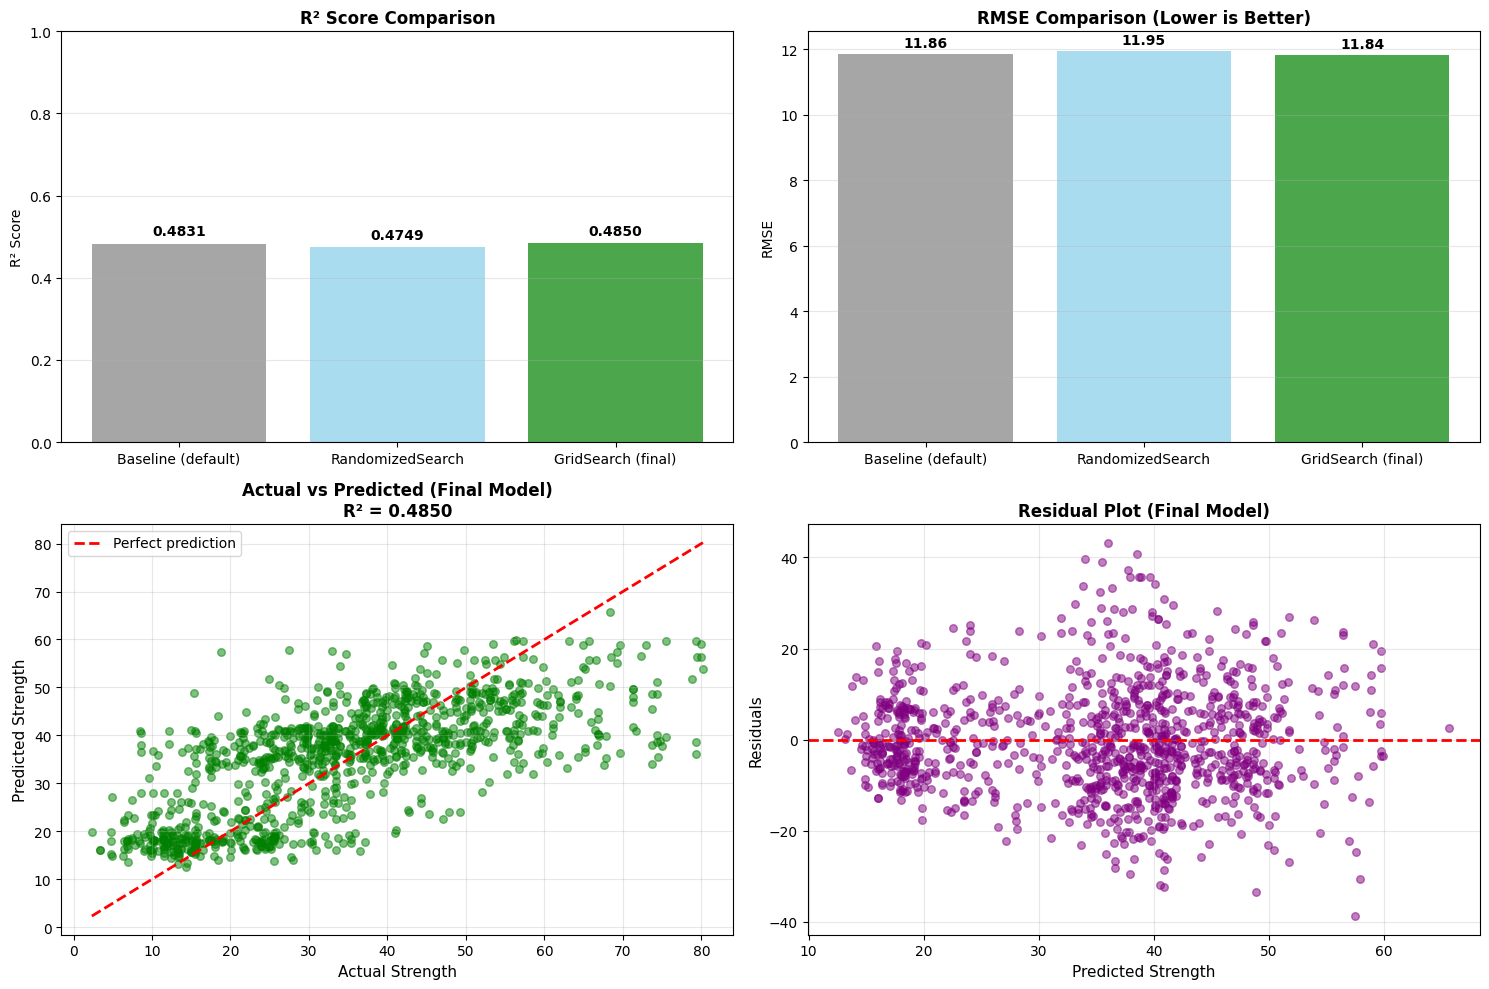


STEP 5: FEATURE IMPORTANCE (Final Model)

                  Feature  Importance
    Water_Age_Interaction    0.195793
                Age_Young    0.090208
                Age_Cubed    0.079071
   Binder_Age_Interaction    0.077967
              Age_Squared    0.049541
                AgeInDays    0.048934
                  Age_Log    0.048504
                 Age_Sqrt    0.041054
                  Age_Old    0.034014
   Cement_Age_Interaction    0.030475
       Water_Cement_Ratio    0.021000
       WC_Age_Interaction    0.020494
           Cement_Squared    0.016799
        Binder_Percentage    0.015167
             Total_Binder    0.014495
       Water_Binder_Ratio    0.014396
               Age_Medium    0.014300
         WC_Ratio_Squared    0.012629
SuperplasticizerComponent    0.012576
        Binder_Efficiency    0.012552
           WaterComponent    0.011871
         Water_Percentage    0.011511
 Plasticizer_Cement_Ratio    0.011081
            Water_Squared    0.010785
   Fine

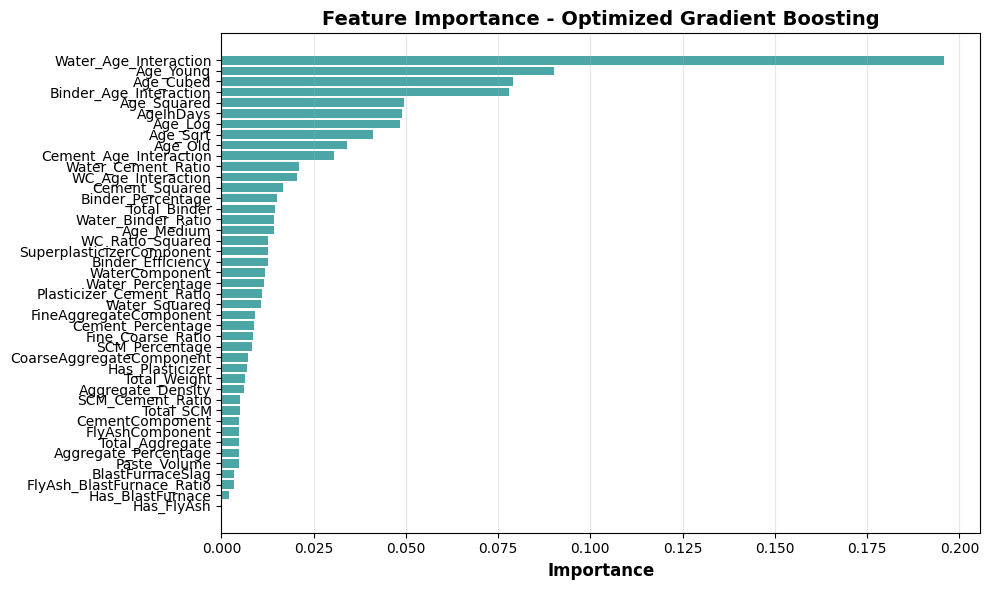


STEP 6: BEST MODEL SUMMARY

✓ Best Gradient Boosting Model:
  - R² Score: 0.4850
  - RMSE: 11.8378
  - MAE: 9.2421

✓ Model saved as: best_model

To use this model for predictions:
  predictions = best_model.predict(new_data)

HYPERPARAMETER TUNING COMPLETE!


In [23]:
# HYPERPARAMETER TUNING - Gradient Boosting Optimization
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import time

print("="*70)
print("GRADIENT BOOSTING - HYPERPARAMETER TUNING")
print("="*70)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Features: {X_train.shape[1]}")

# ============================================================================
# STEP 1: Baseline Model (default parameters)
# ============================================================================
print("\n" + "="*70)
print("STEP 1: BASELINE MODEL (default parameters)")
print("="*70)

baseline_model = GradientBoostingRegressor(random_state=42)
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)

baseline_mse = mean_squared_error(y_test, y_pred_baseline)
baseline_rmse = np.sqrt(baseline_mse)
baseline_mae = mean_absolute_error(y_test, y_pred_baseline)
baseline_r2 = r2_score(y_test, y_pred_baseline)

print(f"\nBaseline Results:")
print(f"  MSE:  {baseline_mse:.4f}")
print(f"  RMSE: {baseline_rmse:.4f}")
print(f"  MAE:  {baseline_mae:.4f}")
print(f"  R²:   {baseline_r2:.4f}")

# ============================================================================
# STEP 2: Randomized Search (fast exploration)
# ============================================================================
print("\n" + "="*70)
print("STEP 2: RANDOMIZED SEARCH (exploring parameter space)")
print("="*70)

# Define parameter distribution for random search
param_distributions = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [34, 5, 6, 7, 8, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [ 2, 4],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

print("\nParameter space:")
for param, values in param_distributions.items():
    print(f"  {param:20s}: {values}")

print(f"\nRunning RandomizedSearchCV with 50 iterations and 5-fold CV...")
print("This may take several minutes...\n")

start_time = time.time()

random_search = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_distributions=param_distributions,
    n_iter=15,  # Try 50 random combinations
    cv=3,  # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1,  # Use all CPU cores
    random_state=42,
    verbose=1
)

random_search.fit(X_train, y_train)

random_search_time = time.time() - start_time

print(f"\n✓ RandomizedSearchCV completed in {random_search_time:.2f} seconds")
print(f"\nBest parameters found:")
for param, value in random_search.best_params_.items():
    print(f"  {param:20s}: {value}")

print(f"\nBest CV R² score: {random_search.best_score_:.4f}")

# Evaluate on test set
y_pred_random = random_search.predict(X_test)
random_mse = mean_squared_error(y_test, y_pred_random)
random_rmse = np.sqrt(random_mse)
random_mae = mean_absolute_error(y_test, y_pred_random)
random_r2 = r2_score(y_test, y_pred_random)

print(f"\nTest set results (RandomizedSearch best model):")
print(f"  MSE:  {random_mse:.4f}")
print(f"  RMSE: {random_rmse:.4f}")
print(f"  MAE:  {random_mae:.4f}")
print(f"  R²:   {random_r2:.4f}")

# ============================================================================
# STEP 3: Grid Search (fine-tuning around best parameters)
# ============================================================================
print("\n" + "="*70)
print("STEP 3: GRID SEARCH (fine-tuning best parameters)")
print("="*70)

# Create a narrow grid around the best parameters
best_params = random_search.best_params_

# Define narrow ranges around best values
grid_param = {
    'n_estimators': [max(100, best_params['n_estimators'] - 100), 
                     best_params['n_estimators'], 
                     best_params['n_estimators'] + 100],
    'learning_rate': [max(0.01, best_params['learning_rate'] - 0.02), 
                      best_params['learning_rate'], 
                      min(0.3, best_params['learning_rate'] + 0.02)],
    'max_depth': [max(3, best_params['max_depth'] - 1), 
                  best_params['max_depth'], 
                  best_params['max_depth'] + 1],
    'min_samples_split': [best_params['min_samples_split']],
    'min_samples_leaf': [best_params['min_samples_leaf']],
    'subsample': [best_params['subsample']],
    'max_features': [best_params['max_features']]
}

print("\nFine-tuning grid:")
for param, values in grid_param.items():
    print(f"  {param:20s}: {values}")

print(f"\nRunning GridSearchCV with 5-fold CV...")
print("This may take a few minutes...\n")

start_time = time.time()

grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=grid_param,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

grid_search_time = time.time() - start_time

print(f"\n✓ GridSearchCV completed in {grid_search_time:.2f} seconds")
print(f"\nFinal best parameters:")
for param, value in grid_search.best_params_.items():
    print(f"  {param:20s}: {value}")

print(f"\nBest CV R² score: {grid_search.best_score_:.4f}")

# Evaluate on test set
y_pred_grid = grid_search.predict(X_test)
grid_mse = mean_squared_error(y_test, y_pred_grid)
grid_rmse = np.sqrt(grid_mse)
grid_mae = mean_absolute_error(y_test, y_pred_grid)
grid_r2 = r2_score(y_test, y_pred_grid)

print(f"\nTest set results (GridSearch best model):")
print(f"  MSE:  {grid_mse:.4f}")
print(f"  RMSE: {grid_rmse:.4f}")
print(f"  MAE:  {grid_mae:.4f}")
print(f"  R²:   {grid_r2:.4f}")

# ============================================================================
# STEP 4: Comparison and Visualization
# ============================================================================
print("\n" + "="*70)
print("STEP 4: MODEL COMPARISON")
print("="*70)

comparison_data = {
    'Model': ['Baseline (default)', 'RandomizedSearch', 'GridSearch (final)'],
    'MSE': [baseline_mse, random_mse, grid_mse],
    'RMSE': [baseline_rmse, random_rmse, grid_rmse],
    'MAE': [baseline_mae, random_mae, grid_mae],
    'R² Score': [baseline_r2, random_r2, grid_r2]
}

comparison_df = pd.DataFrame(comparison_data)
print("\n" + comparison_df.to_string(index=False))

# Calculate improvements
r2_improvement = ((grid_r2 - baseline_r2) / baseline_r2) * 100
rmse_improvement = ((baseline_rmse - grid_rmse) / baseline_rmse) * 100

print(f"\n📈 IMPROVEMENTS:")
print(f"  R² improvement:   {r2_improvement:+.2f}%")
print(f"  RMSE improvement: {rmse_improvement:+.2f}%")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# R² comparison
axes[0, 0].bar(comparison_df['Model'], comparison_df['R² Score'], color=['gray', 'skyblue', 'green'], alpha=0.7)
axes[0, 0].set_title('R² Score Comparison', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].grid(axis='y', alpha=0.3)
axes[0, 0].set_ylim(0, 1)
for i, v in enumerate(comparison_df['R² Score']):
    axes[0, 0].text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')

# RMSE comparison
axes[0, 1].bar(comparison_df['Model'], comparison_df['RMSE'], color=['gray', 'skyblue', 'green'], alpha=0.7)
axes[0, 1].set_title('RMSE Comparison (Lower is Better)', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate(comparison_df['RMSE']):
    axes[0, 1].text(i, v + 0.2, f'{v:.2f}', ha='center', fontweight='bold')

# Actual vs Predicted (GridSearch model)
axes[1, 0].scatter(y_test, y_pred_grid, alpha=0.5, s=30, color='green')
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect prediction')
axes[1, 0].set_xlabel('Actual Strength', fontsize=11)
axes[1, 0].set_ylabel('Predicted Strength', fontsize=11)
axes[1, 0].set_title(f'Actual vs Predicted (Final Model)\nR² = {grid_r2:.4f}', fontsize=12, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Residuals plot
residuals = y_test - y_pred_grid
axes[1, 1].scatter(y_pred_grid, residuals, alpha=0.5, s=30, color='purple')
axes[1, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1, 1].set_xlabel('Predicted Strength', fontsize=11)
axes[1, 1].set_ylabel('Residuals', fontsize=11)
axes[1, 1].set_title('Residual Plot (Final Model)', fontsize=12, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# STEP 5: Feature Importance (Final Model)
# ============================================================================
print("\n" + "="*70)
print("STEP 5: FEATURE IMPORTANCE (Final Model)")
print("="*70)

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': grid_search.best_estimator_.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n" + feature_importance.to_string(index=False))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='teal', alpha=0.7)
plt.xlabel('Importance', fontsize=12, fontweight='bold')
plt.title('Feature Importance - Optimized Gradient Boosting', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================================================
# STEP 6: Save Best Model
# ============================================================================
print("\n" + "="*70)
print("STEP 6: BEST MODEL SUMMARY")
print("="*70)

best_model = grid_search.best_estimator_

print(f"\n✓ Best Gradient Boosting Model:")
print(f"  - R² Score: {grid_r2:.4f}")
print(f"  - RMSE: {grid_rmse:.4f}")
print(f"  - MAE: {grid_mae:.4f}")
print(f"\n✓ Model saved as: best_model")
print(f"\nTo use this model for predictions:")
print(f"  predictions = best_model.predict(new_data)")

print("\n" + "="*70)
print("HYPERPARAMETER TUNING COMPLETE!")
print("="*70)

In [36]:
# save best model for streamlit app
import joblib
joblib.dump(best_model, 'best_gradient_boosting_model.pkl')

['best_gradient_boosting_model.pkl']

In [37]:
# Save the best model and data for Streamlit app
import pickle
import joblib

print("="*70)
print("SAVING BEST MODEL FOR STREAMLIT APP")
print("="*70)

# Retrain on full data for best performance
best_model.fit(X_train, y_train)

print(f"\nBest Model: Gradient Boosting Regressor Optimized")
print(f"R² Score: {results_df.iloc[0]['R2 Score']:.4f}")

# Save model
joblib.dump(best_model, 'best_concrete_model.pkl')
print(f"\n✓ Model saved as: best_concrete_model.pkl")

# Save feature names
feature_names = X_train.columns.tolist()
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(feature_names, f)
print(f"✓ Feature names saved as: feature_names.pkl")

# Save training data for SHAP (sample for speed)
X_train_sample = X_train.sample(n=min(100, len(X_train)), random_state=42)
joblib.dump(X_train_sample, 'X_train_sample.pkl')
print(f"✓ Training sample saved as: X_train_sample.pkl")

# Save statistics for input validation
feature_stats = df_imputed_knn.describe().to_dict()
with open('feature_stats.pkl', 'wb') as f:
    pickle.dump(feature_stats, f)
print(f"✓ Feature statistics saved as: feature_stats.pkl")

print("\n" + "="*70)
print("FILES READY FOR STREAMLIT APP")
print("="*70)
print("\nSaved files:")
print("  1. best_concrete_model.pkl - Trained model")
print("  2. feature_names.pkl - Feature names")
print("  3. X_train_sample.pkl - Training data for SHAP")
print("  4. feature_stats.pkl - Feature statistics")
print("\nNext: Run the Streamlit app with: streamlit run app.")

SAVING BEST MODEL FOR STREAMLIT APP

Best Model: Gradient Boosting Regressor Optimized
R² Score: 0.4831

✓ Model saved as: best_concrete_model.pkl
✓ Feature names saved as: feature_names.pkl
✓ Training sample saved as: X_train_sample.pkl
✓ Feature statistics saved as: feature_stats.pkl

FILES READY FOR STREAMLIT APP

Saved files:
  1. best_concrete_model.pkl - Trained model
  2. feature_names.pkl - Feature names
  3. X_train_sample.pkl - Training data for SHAP
  4. feature_stats.pkl - Feature statistics

Next: Run the Streamlit app with: streamlit run app.


# the progress in the variance explained does not justify augmentation fo the number of the feature also because we want to give advice on the mix

In [32]:
X= df_imputed_knn.drop(columns=['Strength'])
y= df_imputed_knn['Strength']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Features: {X_train.shape[1]}")

# ============================================================================
# STEP 1: Baseline Model (default parameters)
# ============================================================================
print("\n" + "="*70)
print("STEP 1: BASELINE MODEL (default parameters)")
print("="*70)

best_model = GradientBoostingRegressor(random_state=42)
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)

baseline_mse = mean_squared_error(y_test, y_pred_baseline)
baseline_rmse = np.sqrt(baseline_mse)
baseline_mae = mean_absolute_error(y_test, y_pred_baseline)
baseline_r2 = r2_score(y_test, y_pred_baseline)

print(f"\nBaseline Results:")
print(f"  MSE:  {baseline_mse:.4f}")
print(f"  RMSE: {baseline_rmse:.4f}")
print(f"  MAE:  {baseline_mae:.4f}")
print(f"  R²:   {baseline_r2:.4f}")

#save all the pkls




Training set: 4325 samples
Test set: 1082 samples
Features: 8

STEP 1: BASELINE MODEL (default parameters)

Baseline Results:
  MSE:  140.5207
  RMSE: 11.8541
  MAE:  9.2800
  R²:   0.4836


## Shap


SHAP ANALYSIS - Explaining Best Model Predictions


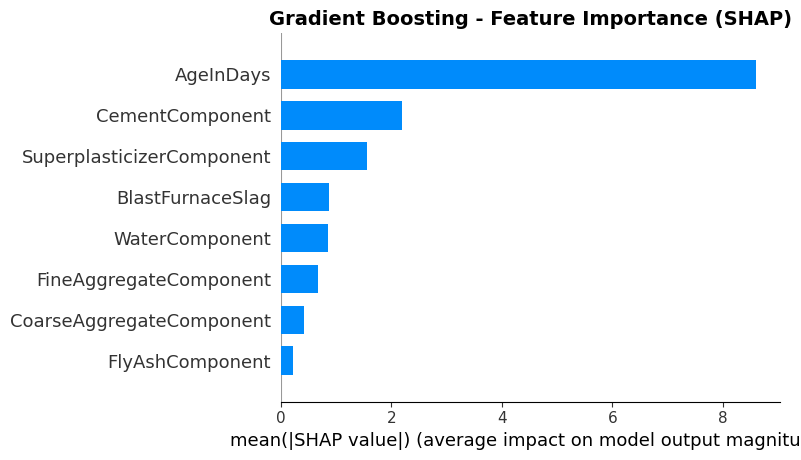

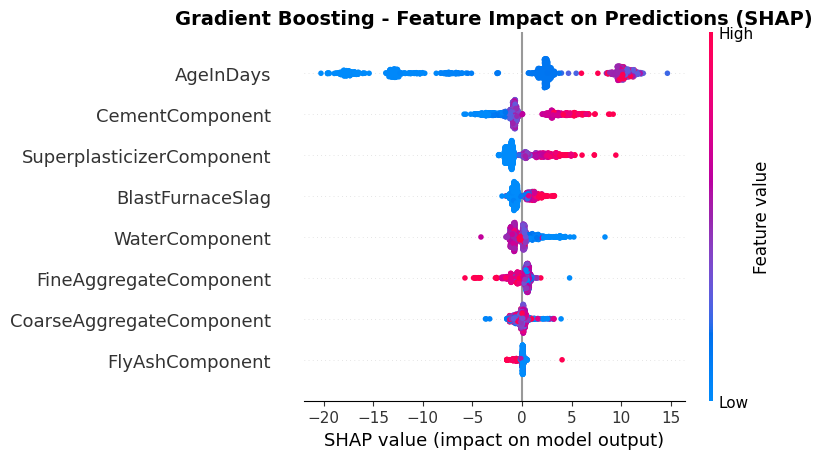

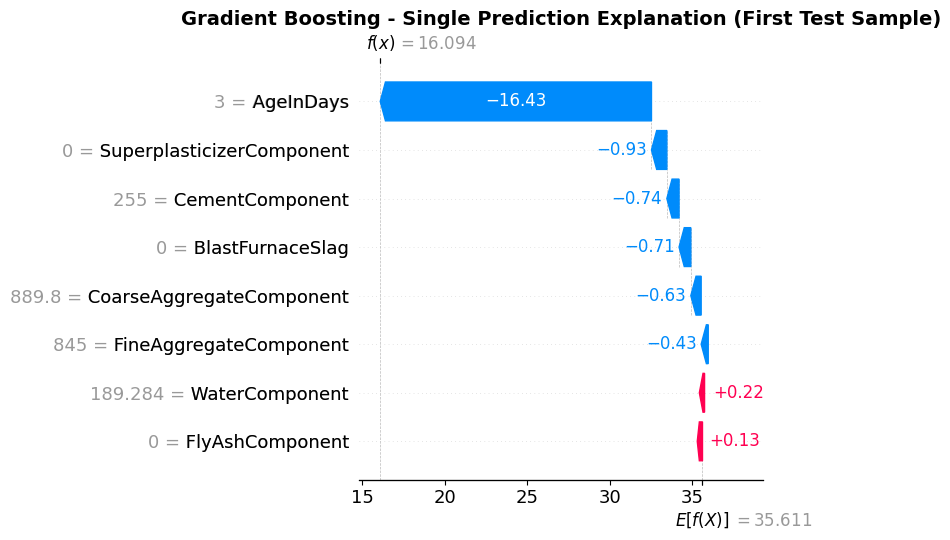


ANALYSIS COMPLETE


In [35]:
# SHAP Analysis for best model
print("\n" + "="*70)
print("SHAP ANALYSIS - Explaining Best Model Predictions")
print("="*70)

best_model_name='Gradient Boosting'

# Get the model
model=best_model
model.fit(X_train, y_train)

# Create SHAP explainer
try:
    if best_model_name in ['Decision Tree', 'Random Forest', 'Gradient Boosting']:
        # Tree-based models can use TreeExplainer
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
    else:
        # For other models, use KernelExplainer (slower but works for any model)
        # Use a smaller background dataset for faster computation
        background = shap.sample(X_train, 100)
        explainer = shap.KernelExplainer(model.predict, background)
        shap_values = explainer.shap_values(X_test[:100])  # Limit test samples for speed
        X_test_sample = X_test[:100]
    
    # Summary plot (bar)
    plt.figure(figsize=(10, 6))
    if best_model_name in ['Decision Tree', 'Random Forest', 'Gradient Boosting']:
        shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
    else:
        shap.summary_plot(shap_values, X_test_sample, plot_type="bar", show=False)
    plt.title(f'{best_model_name} - Feature Importance (SHAP)', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Summary plot (beeswarm)
    plt.figure(figsize=(10, 6))
    if best_model_name in ['Decision Tree', 'Random Forest', 'Gradient Boosting']:
        shap.summary_plot(shap_values, X_test, show=False)
    else:
        shap.summary_plot(shap_values, X_test_sample, show=False)
    plt.title(f'{best_model_name} - Feature Impact on Predictions (SHAP)', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Waterfall plot for first prediction
    plt.figure(figsize=(10, 6))
    if best_model_name in ['Decision Tree', 'Random Forest', 'Gradient Boosting']:
        shap.waterfall_plot(shap.Explanation(values=shap_values[0], 
                                              base_values=explainer.expected_value, 
                                              data=X_test.iloc[0],
                                              feature_names=X_test.columns.tolist()),
                           show=False)
    else:
        shap.waterfall_plot(shap.Explanation(values=shap_values[0], 
                                              base_values=explainer.expected_value, 
                                              data=X_test_sample.iloc[0],
                                              feature_names=X_test.columns.tolist()),
                           show=False)
    plt.title(f'{best_model_name} - Single Prediction Explanation (First Test Sample)', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error creating SHAP explanation for {best_model_name}: {str(e)}")
    print("Skipping SHAP analysis for this model...")

print("\n" + "="*70)
print("ANALYSIS COMPLETE")
print("="*70)